# pyCisTopic scATAC processing

In [1]:
import pycisTopic
import pandas as pd
import os
pycisTopic.__version__

'2.0a0'

In [ ]:
!ls /outs

barcode_doublets_atac_Q3.csv  consensus_peak_calling	  models.pkl
cistopic_obj.pkl	      consensus_regions.sort.bed  qc


In [ ]:
!pwd

In [4]:
os.chdir(os.getcwd())

# Once the cistopic modeling is finished

In [ ]:
! cat logs/R-cistopic_modelling.*.out

In [6]:
import pickle
file_path = os.path.join(os.getcwd(), "outs/cistopic_obj.pkl")
with open(file_path, 'rb') as file:
    cistopic_obj = pickle.load(file)

print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 1972 × 135084


In [7]:
cistopic_obj.cell_data

cisTopic_nr_frag  total_fragments_in_peaks_count  \
CAATTGCGTGTCCTGA-Q3___Q3             8093                           11343   
AAGGTATGTTAGGTTC-Q3___Q3             9050                           12536   
CGTAATCGTGCGATTT-Q3___Q3            10870                           15205   
TGGATTCGTGCAGTAA-Q3___Q3             9479                           13269   
CAAGGCTCACTAGCTT-Q3___Q3             8877                           12402   
...                                   ...                             ...   
CCTCAGCCATGAGCCG-Q3___Q3             2625                            3567   
CGAGCGAGTATTGAGG-Q3___Q3             1404                            1939   
GCTATGCTCCACTATG-Q3___Q3             1578                            2160   
GTTGTCATCATGCCTA-Q3___Q3             1653                            2338   
AAGCTTGCATGACAAT-Q3___Q3             1194                            1621   

                          pdf_values_for_tss_enrichment cisTopic_log_nr_frag  \
CAATTGCGTGTCCTGA-Q3___Q3                       0.037338              3.90811   
AAGGTATGTTAGGTTC-Q3___Q3                       0.088176             3.956649   
CGTAATCGTGCGATTT-Q3___Q3                       0.062638              4.03623   
TGGATTCGTGCAGTAA-Q3___Q3                       0.092411             3.976763   
CAAGGCTCACTAGCTT-Q3___Q3                       0.076996             3.948266   
...                                                 ...                  ...   
CCTCAGCCATGAGCCG-Q3___Q3                       0.091211             3.419129   
CGAGCGAGTATTGAGG-Q3___Q3                       0.013062             3.147367   
GCTATGCTCCACTATG-Q3___Q3                       0.002743             3.198107   
GTTGTCATCATGCCTA-Q3___Q3                       0.050342             3.218273   
AAGCTTGCATGACAAT-Q3___Q3                       0.003724             3.077004   

                          log10_unique_fragments_in_peaks_count  \
CAATTGCGTGTCCTGA-Q3___Q3                               3.883377   
AAGGTATGTTAGGTTC-Q3___Q3                               3.930949   
CGTAATCGTGCGATTT-Q3___Q3                               4.013974   
TGGATTCGTGCAGTAA-Q3___Q3                               3.952599   
CAAGGCTCACTAGCTT-Q3___Q3                               3.922310   
...                                                         ...   
CCTCAGCCATGAGCCG-Q3___Q3                               3.393400   
CGAGCGAGTATTGAGG-Q3___Q3                               3.126131   
GCTATGCTCCACTATG-Q3___Q3                               3.170848   
GTTGTCATCATGCCTA-Q3___Q3                               3.186674   
AAGCTTGCATGACAAT-Q3___Q3                               3.054613   

                          doublet_outlier  fraction_of_fragments_in_peaks  \
CAATTGCGTGTCCTGA-Q3___Q3            False                        0.600424   
AAGGTATGTTAGGTTC-Q3___Q3            False                        0.619660   
CGTAATCGTGCGATTT-Q3___Q3            False                        0.606769   
TGGATTCGTGCAGTAA-Q3___Q3            False                        0.609574   
CAAGGCTCACTAGCTT-Q3___Q3            False                        0.435219   
...                                   ...                             ...   
CCTCAGCCATGAGCCG-Q3___Q3            False                        0.664249   
CGAGCGAGTATTGAGG-Q3___Q3            False                        0.603160   
GCTATGCTCCACTATG-Q3___Q3            False                        0.632906   
GTTGTCATCATGCCTA-Q3___Q3            False                        0.746356   
AAGCTTGCATGACAAT-Q3___Q3            False                        0.683766   

                          duplication_count  barcode_rank  duplication_ratio  \
CAATTGCGTGTCCTGA-Q3___Q3               6071           722           0.322891   
AAGGTATGTTAGGTTC-Q3___Q3               6522           662           0.321503   
CGTAATCGTGCGATTT-Q3___Q3               8180           494           0.324629   
TGGATTCGTGCAGTAA-Q3___Q3               7141           613           0.326849   
CAAGGCTCA

In [8]:
file_path = os.path.join(os.getcwd(),"outs/models.pkl")
with open(file_path, 'rb') as file:
    models = pickle.load(file)

print(models)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-11 15:33:11,283	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


[<pycisTopic.lda_models.CistopicLDAModel object at 0x1515b481d4d0>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1515b10b8cd0>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1515b10bbb10>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1515b10c6c90>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1515b10cdf90>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1515b10d1310>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1515b10e0910>]


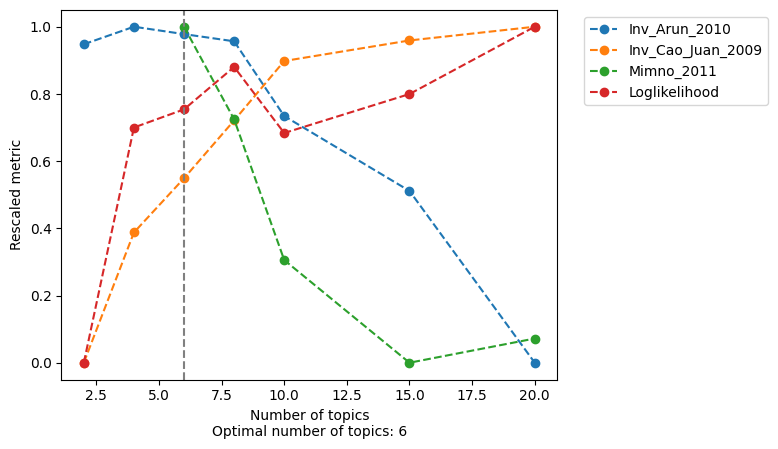

In [9]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
   select_model = 6,
    return_model = True
)

choosing model with 6 topics

In [10]:
cistopic_obj.add_LDA_model(model)

In [11]:
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

In [12]:
out_dir

'outs'

In [13]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "subset_cistopic_obj_all_info.pkl"), "wb")
)

# Clustering and visualisation

In [14]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

In [15]:
find_clusters(
    cistopic_obj,
    target  = 'cell',
    k = 10,
    res = [0.2,0.3,0.6, 1.2, 3,6],
    prefix = 'pycisTopic_',
    scale = True,
    split_pattern = '-'
)

2025-07-11 15:33:17,634 cisTopic     INFO     Finding neighbours


In [16]:
cistopic_obj.cell_data

cisTopic_nr_frag  total_fragments_in_peaks_count  \
CAATTGCGTGTCCTGA-Q3___Q3             8093                           11343   
AAGGTATGTTAGGTTC-Q3___Q3             9050                           12536   
CGTAATCGTGCGATTT-Q3___Q3            10870                           15205   
TGGATTCGTGCAGTAA-Q3___Q3             9479                           13269   
CAAGGCTCACTAGCTT-Q3___Q3             8877                           12402   
...                                   ...                             ...   
CCTCAGCCATGAGCCG-Q3___Q3             2625                            3567   
CGAGCGAGTATTGAGG-Q3___Q3             1404                            1939   
GCTATGCTCCACTATG-Q3___Q3             1578                            2160   
GTTGTCATCATGCCTA-Q3___Q3             1653                            2338   
AAGCTTGCATGACAAT-Q3___Q3             1194                            1621   

                          pdf_values_for_tss_enrichment cisTopic_log_nr_frag  \
CAATTGCGTGTCCTGA-Q3___Q3                       0.037338              3.90811   
AAGGTATGTTAGGTTC-Q3___Q3                       0.088176             3.956649   
CGTAATCGTGCGATTT-Q3___Q3                       0.062638              4.03623   
TGGATTCGTGCAGTAA-Q3___Q3                       0.092411             3.976763   
CAAGGCTCACTAGCTT-Q3___Q3                       0.076996             3.948266   
...                                                 ...                  ...   
CCTCAGCCATGAGCCG-Q3___Q3                       0.091211             3.419129   
CGAGCGAGTATTGAGG-Q3___Q3                       0.013062             3.147367   
GCTATGCTCCACTATG-Q3___Q3                       0.002743             3.198107   
GTTGTCATCATGCCTA-Q3___Q3                       0.050342             3.218273   
AAGCTTGCATGACAAT-Q3___Q3                       0.003724             3.077004   

                          log10_unique_fragments_in_peaks_count  \
CAATTGCGTGTCCTGA-Q3___Q3                               3.883377   
AAGGTATGTTAGGTTC-Q3___Q3                               3.930949   
CGTAATCGTGCGATTT-Q3___Q3                               4.013974   
TGGATTCGTGCAGTAA-Q3___Q3                               3.952599   
CAAGGCTCACTAGCTT-Q3___Q3                               3.922310   
...                                                         ...   
CCTCAGCCATGAGCCG-Q3___Q3                               3.393400   
CGAGCGAGTATTGAGG-Q3___Q3                               3.126131   
GCTATGCTCCACTATG-Q3___Q3                               3.170848   
GTTGTCATCATGCCTA-Q3___Q3                               3.186674   
AAGCTTGCATGACAAT-Q3___Q3                               3.054613   

                          doublet_outlier  fraction_of_fragments_in_peaks  \
CAATTGCGTGTCCTGA-Q3___Q3            False                        0.600424   
AAGGTATGTTAGGTTC-Q3___Q3            False                        0.619660   
CGTAATCGTGCGATTT-Q3___Q3            False                        0.606769   
TGGATTCGTGCAGTAA-Q3___Q3            False                        0.609574   
CAAGGCTCACTAGCTT-Q3___Q3            False                        0.435219   
...                                   ...                             ...   
CCTCAGCCATGAGCCG-Q3___Q3            False                        0.664249   
CGAGCGAGTATTGAGG-Q3___Q3            False                        0.603160   
GCTATGCTCCACTATG-Q3___Q3            False                        0.632906   
GTTGTCATCATGCCTA-Q3___Q3            False                        0.746356   
AAGCTTGCATGACAAT-Q3___Q3            False                        0.683766   

                          duplication_count  barcode_rank  duplication_ratio  \
CAATTGCGTGTCCTGA-Q3___Q3               6071           722           0.322891   
AAGGTATGTTAGGTTC-Q3___Q3               6522           662           0.321503   
CGTAATCGTGCGATTT-Q3___Q3               8180           494           0.324629   
TGGATTCGTGCAGTAA-Q3___Q3               7141           613           0.326849   
CAAGGCTCA

In [17]:
cistopic_obj.projections["cell"] = {}

In [18]:
run_umap(
    cistopic_obj,
    target  = 'cell', scale=True)

2025-07-11 15:33:18,488 cisTopic     INFO     Running UMAP


/opt/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
run_tsne(
    cistopic_obj,
    target  = 'cell', scale=True)

2025-07-11 15:33:29,648 cisTopic     INFO     Running TSNE


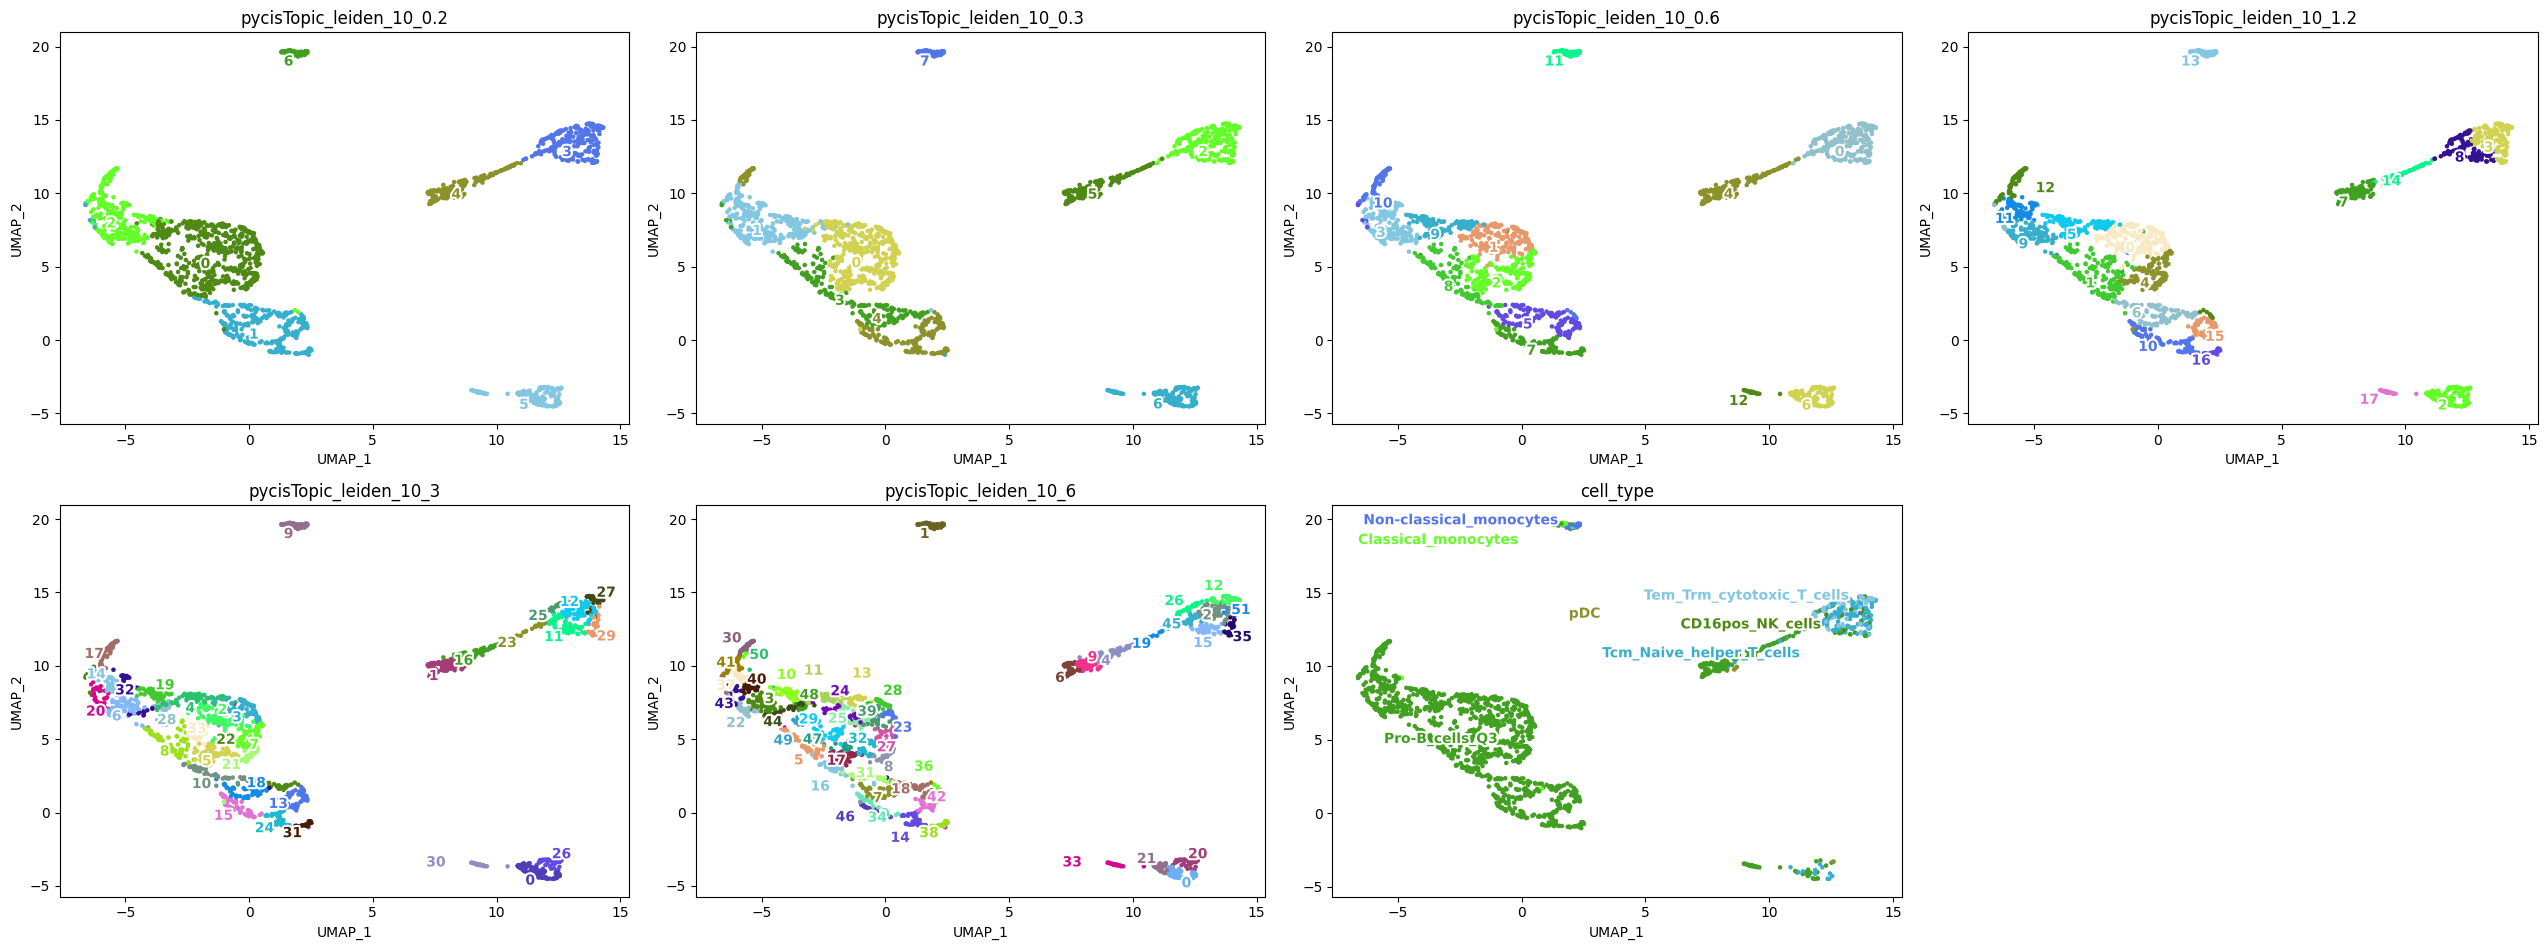

In [21]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3','pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3','pycisTopic_leiden_10_6','cell_type'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

label = 'cell_type_all'

# Extract UMAP coordinates and cell type labels
cistopic_obj.cell_data[label] = cistopic_obj.cell_data['cell_type'].copy()
umap_coords = cistopic_obj.projections['cell']['UMAP']
cell_types = cistopic_obj.cell_data[label]  


missing_mask = cell_types.isna()

# split
X_labeled = umap_coords[~missing_mask]
y_labeled = cell_types[~missing_mask]
X_unlabeled = umap_coords[missing_mask]

#  KNN classifier on labeled data
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_labeled, y_labeled)


imputed_labels = knn.predict(X_unlabeled) # predict


cistopic_obj.cell_data.loc[missing_mask, label] = imputed_labels

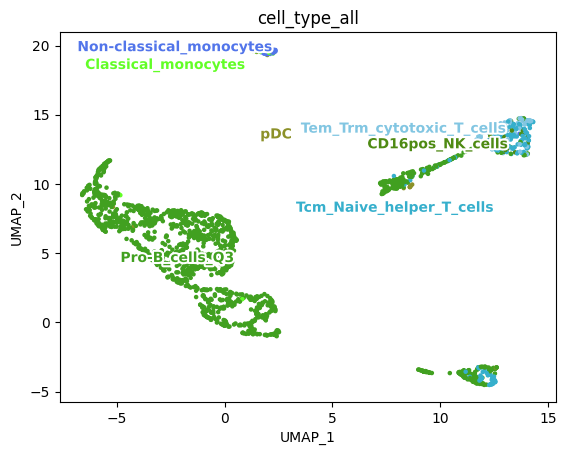

In [24]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type_all'],
    target='cell',
    text_size=10,
    dot_size=5)

In [25]:
cistopic_obj.cell_data['is_nan'] = cistopic_obj.cell_data['cell_type'].isna()
cistopic_obj.cell_data['is_nan'].value_counts()

False    1773
True      199
Name: is_nan, dtype: int64

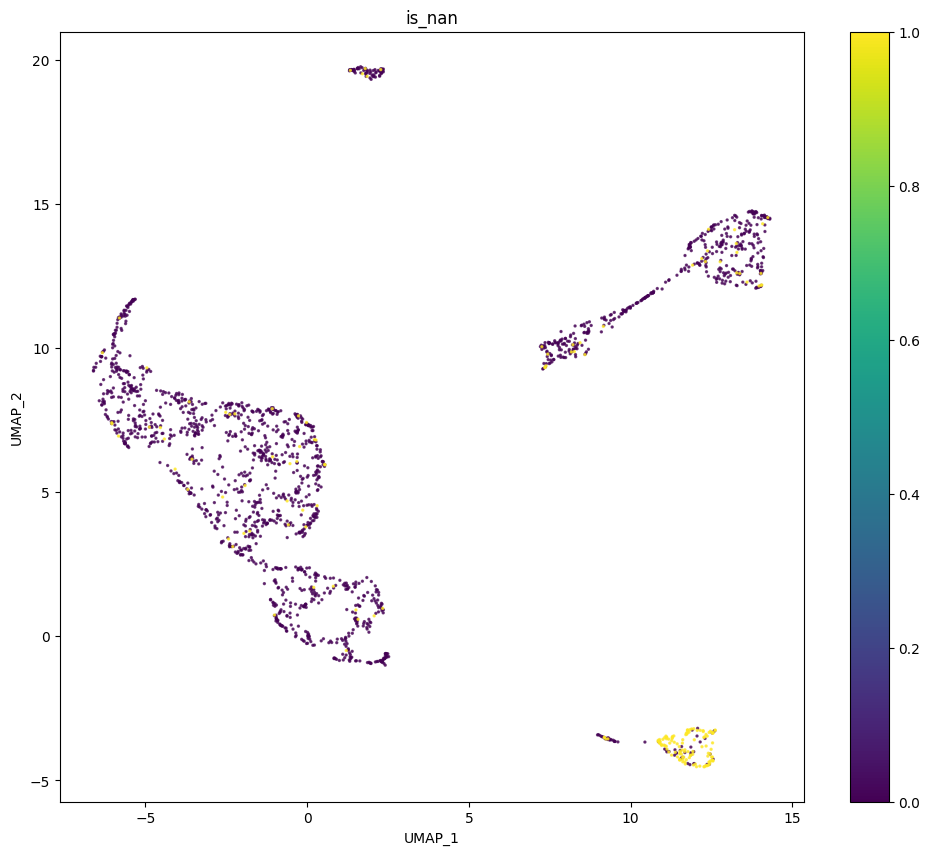

In [26]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['is_nan'],
    remove_nan = False,
    show_label = False,
    target='cell',
    text_size=10,
    dot_size=2,
    alpha = 0.7,
    figsize = (12,10))



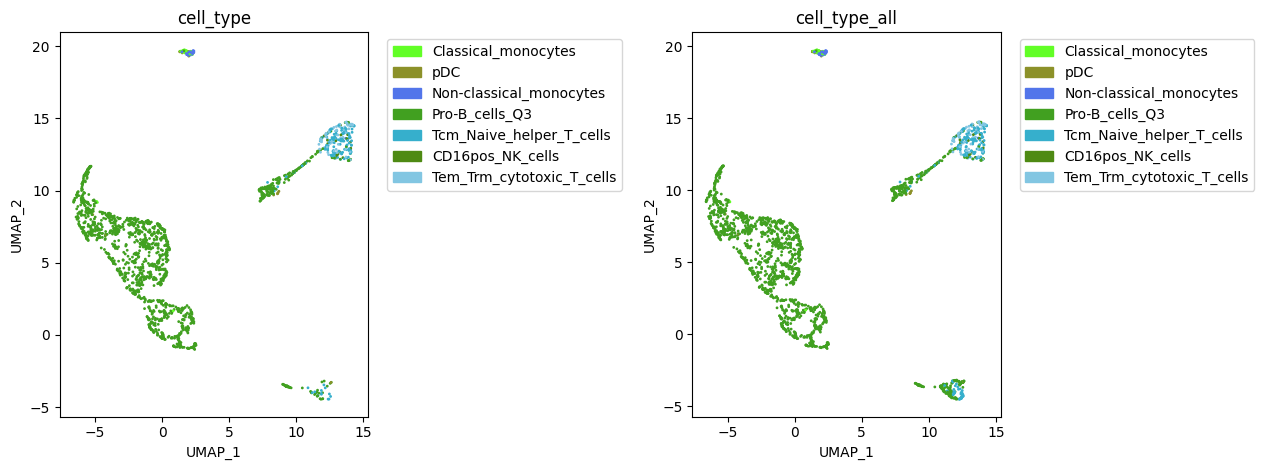

In [27]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type','cell_type_all'],
    target='cell', num_columns=2,
    text_size=3,
    show_label = False,
    show_legend= True,
    dot_size=1)

In [28]:
cistopic_obj.cell_data.cell_type.value_counts()

Pro-B_cells_Q3               1460
Tcm_Naive_helper_T_cells      143
Tem_Trm_cytotoxic_T_cells      78
Non-classical_monocytes        31
Classical_monocytes            24
CD16pos_NK_cells               19
pDC                            18
Name: cell_type, dtype: int64

In [29]:
cistopic_obj.cell_data.cell_type_all.value_counts()

Pro-B_cells_Q3               1605
Tcm_Naive_helper_T_cells      190
Tem_Trm_cytotoxic_T_cells      78
Non-classical_monocytes        34
Classical_monocytes            25
pDC                            20
CD16pos_NK_cells               20
Name: cell_type_all, dtype: int64

In [30]:
subset = cistopic_obj.cell_data[cistopic_obj.cell_data['cell_type'].isna()]  # check the predicted cell types
subset

cisTopic_nr_frag  total_fragments_in_peaks_count  \
GGCCTTTAGGTTCCGT-Q3___Q3             2052                            2887   
GCATATTTCCGCCATG-Q3___Q3             7341                           10225   
TAACTGTTCAGCTATT-Q3___Q3             1875                            2631   
AACTTGTTCTGGATCC-Q3___Q3            10914                           15153   
GCATTATTCAACCGGA-Q3___Q3             7630                           10577   
...                                   ...                             ...   
GGACCTGCATAGACGC-Q3___Q3             1414                            1972   
TTAGGTTTCACTATGT-Q3___Q3             2290                            3190   
GAGATTCAGGCTTGCT-Q3___Q3             2027                            2732   
GAAGGCCTCAACCGGA-Q3___Q3             1424                            1939   
CGTAAAGGTTCACCTC-Q3___Q3             1239                            1701   

                          pdf_values_for_tss_enrichment cisTopic_log_nr_frag  \
GGCCTTTAGGTTCCGT-Q3___Q3                       0.020272             3.312177   
GCATATTTCCGCCATG-Q3___Q3                       0.050698             3.865755   
TAACTGTTCAGCTATT-Q3___Q3                       0.070586             3.273001   
AACTTGTTCTGGATCC-Q3___Q3                       0.071439             4.037984   
GCATTATTCAACCGGA-Q3___Q3                       0.020940             3.882525   
...                                                 ...                  ...   
GGACCTGCATAGACGC-Q3___Q3                       0.036164             3.150449   
TTAGGTTTCACTATGT-Q3___Q3                       0.071019             3.359835   
GAGATTCAGGCTTGCT-Q3___Q3                       0.075248             3.306854   
GAAGGCCTCAACCGGA-Q3___Q3                       0.052733              3.15351   
CGTAAAGGTTCACCTC-Q3___Q3                       0.034826             3.093071   

                          log10_unique_fragments_in_peaks_count  \
GGCCTTTAGGTTCCGT-Q3___Q3                               3.293141   
GCATATTTCCGCCATG-Q3___Q3                               3.844166   
TAACTGTTCAGCTATT-Q3___Q3                               3.248709   
AACTTGTTCTGGATCC-Q3___Q3                               4.015779   
GCATTATTCAACCGGA-Q3___Q3                               3.861176   
...                                                         ...   
GGACCTGCATAGACGC-Q3___Q3                               3.124504   
TTAGGTTTCACTATGT-Q3___Q3                               3.332640   
GAGATTCAGGCTTGCT-Q3___Q3                               3.281488   
GAAGGCCTCAACCGGA-Q3___Q3                               3.135133   
CGTAAAGGTTCACCTC-Q3___Q3                               3.066699   

                          doublet_outlier  fraction_of_fragments_in_peaks  \
GGCCTTTAGGTTCCGT-Q3___Q3            False                        0.453453   
GCATATTTCCGCCATG-Q3___Q3            False                        0.308576   
TAACTGTTCAGCTATT-Q3___Q3            False                        0.427813   
AACTTGTTCTGGATCC-Q3___Q3            False                        0.384835   
GCATTATTCAACCGGA-Q3___Q3            False                        0.491407   
...                                   ...                             ...   
GGACCTGCATAGACGC-Q3___Q3            False                        0.460554   
TTAGGTTTCACTATGT-Q3___Q3            False                        0.569989   
GAGATTCAGGCTTGCT-Q3___Q3            False                        0.579091   
GAAGGCCTCAACCGGA-Q3___Q3            False                        0.356601   
CGTAAAGGTTCACCTC-Q3___Q3            False                        0.356487   

                          duplication_count  barcode_rank  duplication_ratio  \
GGCCTTTAGGTTCCGT-Q3___Q3               2052          1764           0.321580   
GCATATTTCCGCCATG-Q3___Q3              10875           357           0.324549   
TAACTGTTCAGCTATT-Q3___Q3               1916          1813           0.316276   
AACTTGTTCTGGATCC-Q3___Q3              12965           298           0.324864   
GCATTATTC

In [31]:
subset.cell_type_all.value_counts()

Pro-B_cells_Q3              145
Tcm_Naive_helper_T_cells     47
Non-classical_monocytes       3
pDC                           2
CD16pos_NK_cells              1
Classical_monocytes           1
Name: cell_type_all, dtype: int64

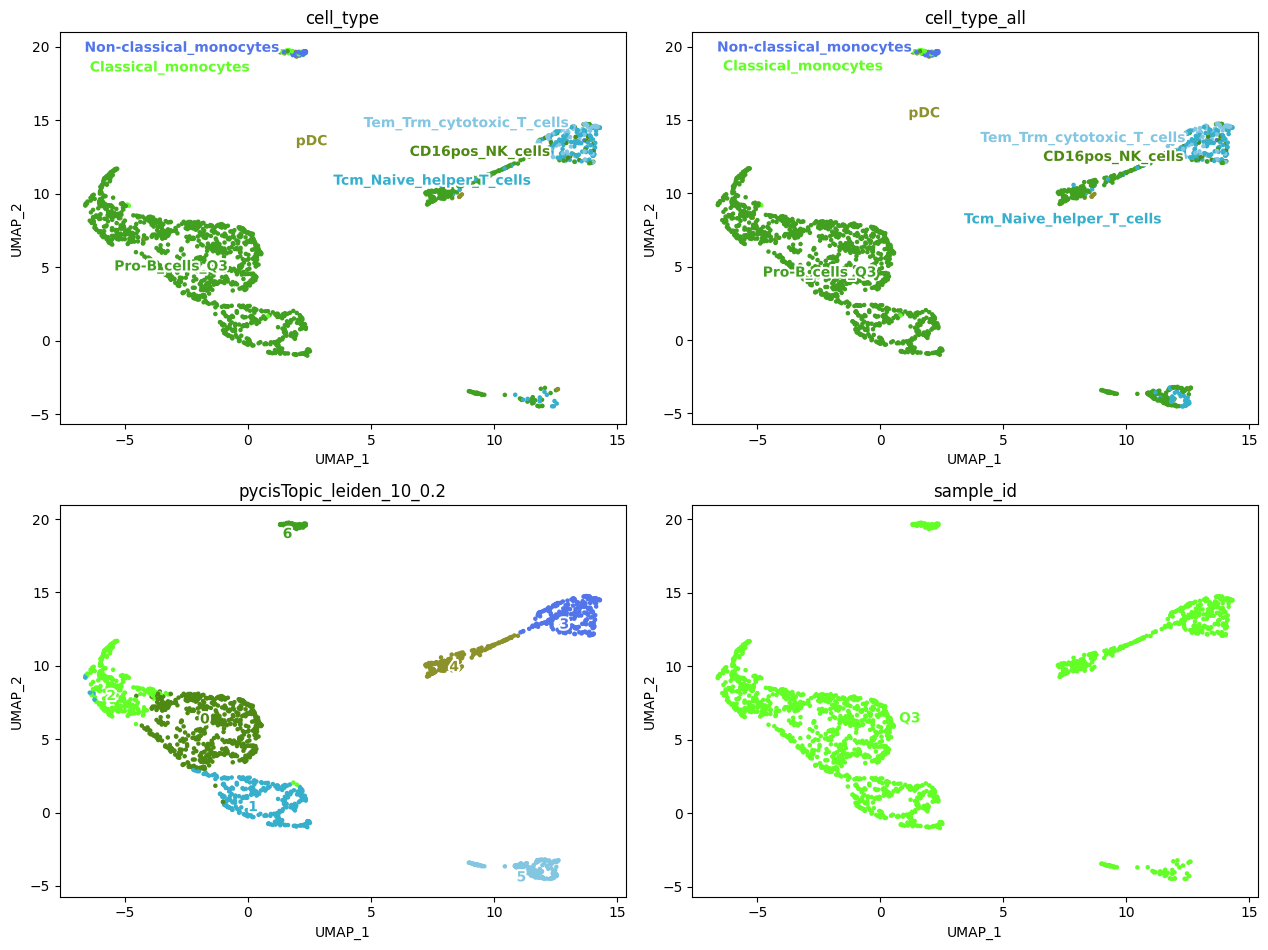

In [32]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type','cell_type_all','pycisTopic_leiden_10_0.2','sample_id'],
    target='cell', num_columns=2,
    text_size=10,
    dot_size=5)

In [33]:
cistopic_obj.cell_data['sample_id'].isna().sum()

199

In [34]:
cistopic_obj.cell_data['cell_type'].isna().sum() # there is  2956 cells that do not have RNA counterpart

199

In [35]:
cistopic_obj.cell_data

cisTopic_nr_frag  total_fragments_in_peaks_count  \
CAATTGCGTGTCCTGA-Q3___Q3             8093                           11343   
AAGGTATGTTAGGTTC-Q3___Q3             9050                           12536   
CGTAATCGTGCGATTT-Q3___Q3            10870                           15205   
TGGATTCGTGCAGTAA-Q3___Q3             9479                           13269   
CAAGGCTCACTAGCTT-Q3___Q3             8877                           12402   
...                                   ...                             ...   
CCTCAGCCATGAGCCG-Q3___Q3             2625                            3567   
CGAGCGAGTATTGAGG-Q3___Q3             1404                            1939   
GCTATGCTCCACTATG-Q3___Q3             1578                            2160   
GTTGTCATCATGCCTA-Q3___Q3             1653                            2338   
AAGCTTGCATGACAAT-Q3___Q3             1194                            1621   

                          pdf_values_for_tss_enrichment cisTopic_log_nr_frag  \
CAATTGCGTGTCCTGA-Q3___Q3                       0.037338              3.90811   
AAGGTATGTTAGGTTC-Q3___Q3                       0.088176             3.956649   
CGTAATCGTGCGATTT-Q3___Q3                       0.062638              4.03623   
TGGATTCGTGCAGTAA-Q3___Q3                       0.092411             3.976763   
CAAGGCTCACTAGCTT-Q3___Q3                       0.076996             3.948266   
...                                                 ...                  ...   
CCTCAGCCATGAGCCG-Q3___Q3                       0.091211             3.419129   
CGAGCGAGTATTGAGG-Q3___Q3                       0.013062             3.147367   
GCTATGCTCCACTATG-Q3___Q3                       0.002743             3.198107   
GTTGTCATCATGCCTA-Q3___Q3                       0.050342             3.218273   
AAGCTTGCATGACAAT-Q3___Q3                       0.003724             3.077004   

                          log10_unique_fragments_in_peaks_count  \
CAATTGCGTGTCCTGA-Q3___Q3                               3.883377   
AAGGTATGTTAGGTTC-Q3___Q3                               3.930949   
CGTAATCGTGCGATTT-Q3___Q3                               4.013974   
TGGATTCGTGCAGTAA-Q3___Q3                               3.952599   
CAAGGCTCACTAGCTT-Q3___Q3                               3.922310   
...                                                         ...   
CCTCAGCCATGAGCCG-Q3___Q3                               3.393400   
CGAGCGAGTATTGAGG-Q3___Q3                               3.126131   
GCTATGCTCCACTATG-Q3___Q3                               3.170848   
GTTGTCATCATGCCTA-Q3___Q3                               3.186674   
AAGCTTGCATGACAAT-Q3___Q3                               3.054613   

                          doublet_outlier  fraction_of_fragments_in_peaks  \
CAATTGCGTGTCCTGA-Q3___Q3            False                        0.600424   
AAGGTATGTTAGGTTC-Q3___Q3            False                        0.619660   
CGTAATCGTGCGATTT-Q3___Q3            False                        0.606769   
TGGATTCGTGCAGTAA-Q3___Q3            False                        0.609574   
CAAGGCTCACTAGCTT-Q3___Q3            False                        0.435219   
...                                   ...                             ...   
CCTCAGCCATGAGCCG-Q3___Q3            False                        0.664249   
CGAGCGAGTATTGAGG-Q3___Q3            False                        0.603160   
GCTATGCTCCACTATG-Q3___Q3            False                        0.632906   
GTTGTCATCATGCCTA-Q3___Q3            False                        0.746356   
AAGCTTGCATGACAAT-Q3___Q3            False                        0.683766   

                          duplication_count  barcode_rank  duplication_ratio  \
CAATTGCGTGTCCTGA-Q3___Q3               6071           722           0.322891   
AAGGTATGTTAGGTTC-Q3___Q3               6522           662           0.321503   
CGTAATCGTGCGATTT-Q3___Q3               8180           494           0.324629   
TGGATTCGTGCAGTAA-Q3___Q3               7141           613           0.326849   
CAAGGCTCA

In [36]:
# remove NAs in sample_id
cistopic_obj.cell_data['sample_id'] = cistopic_obj.cell_data['sample_id'].fillna(cistopic_obj.cell_data.index.to_series().apply(lambda x: x.split('__')[-1]))
cistopic_obj.cell_data['sample_id'] = cistopic_obj.cell_data['sample_id'].str.replace('_','')
cistopic_obj.cell_data['sample_id'].isna().sum()

0

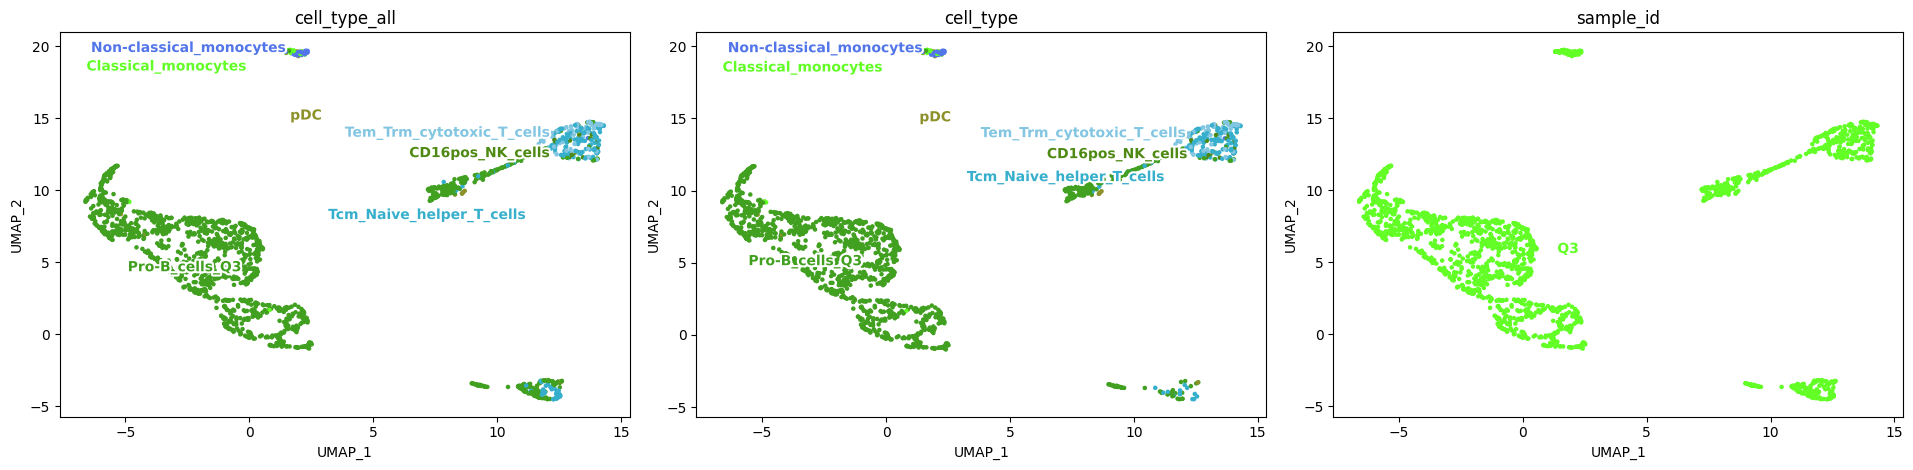

In [37]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type_all','cell_type', 'sample_id'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [38]:
cistopic_obj.cell_data.tss_enrichment.max()

34.59299747493844

In [39]:
cistopic_obj.cell_data.tss_enrichment.min()

10.051438317624147

In [40]:
cistopic_obj.cell_data.tss_enrichment.median()

15.199656295758501

In [41]:
cistopic_obj.cell_data.fraction_of_fragments_in_peaks.median()

0.5996044050214393

In [42]:
cistopic_obj.cell_data.log10_unique_fragments_count.median()

3.8108035708079084

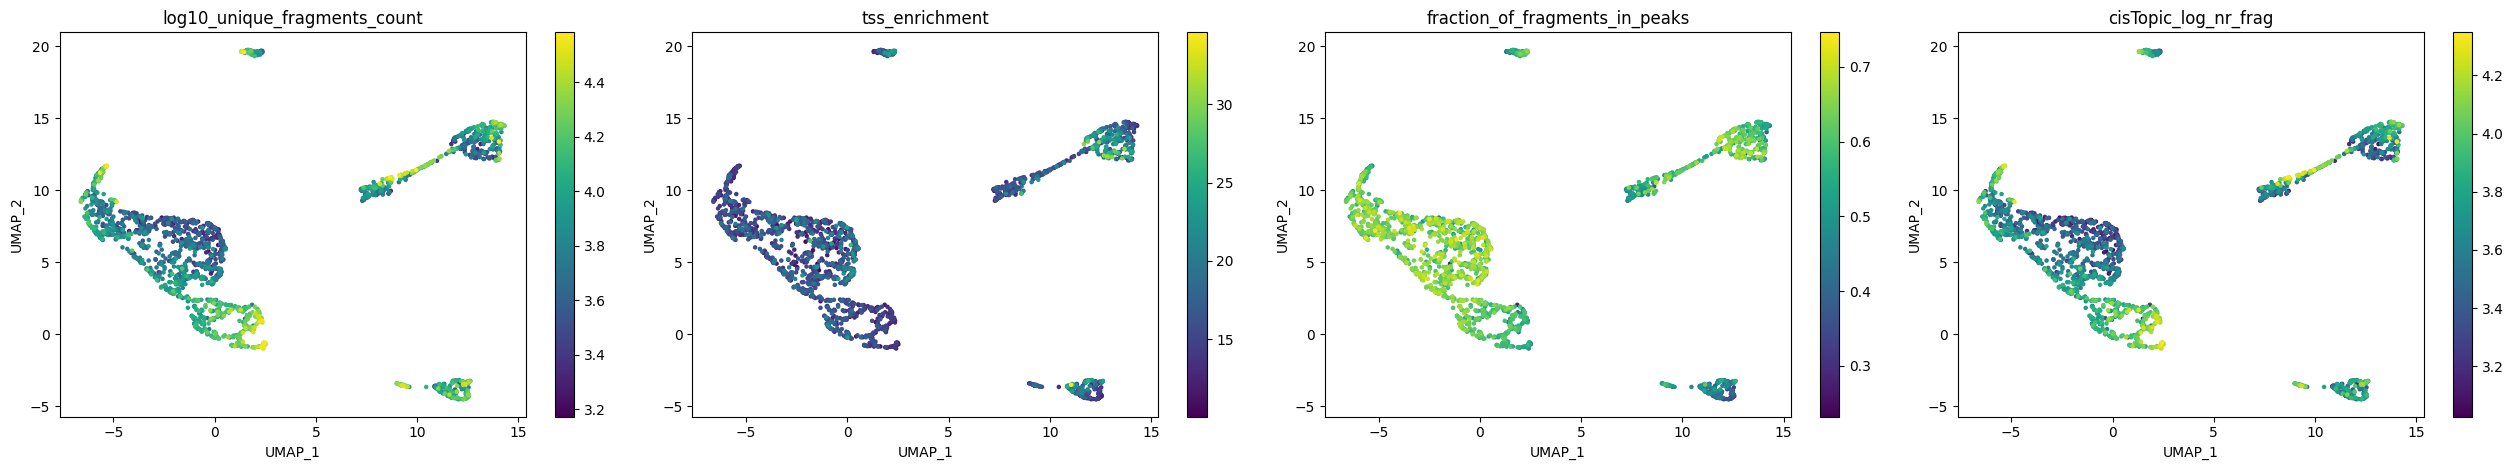

In [43]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['log10_unique_fragments_count', 'tss_enrichment', 'fraction_of_fragments_in_peaks', 'cisTopic_log_nr_frag'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

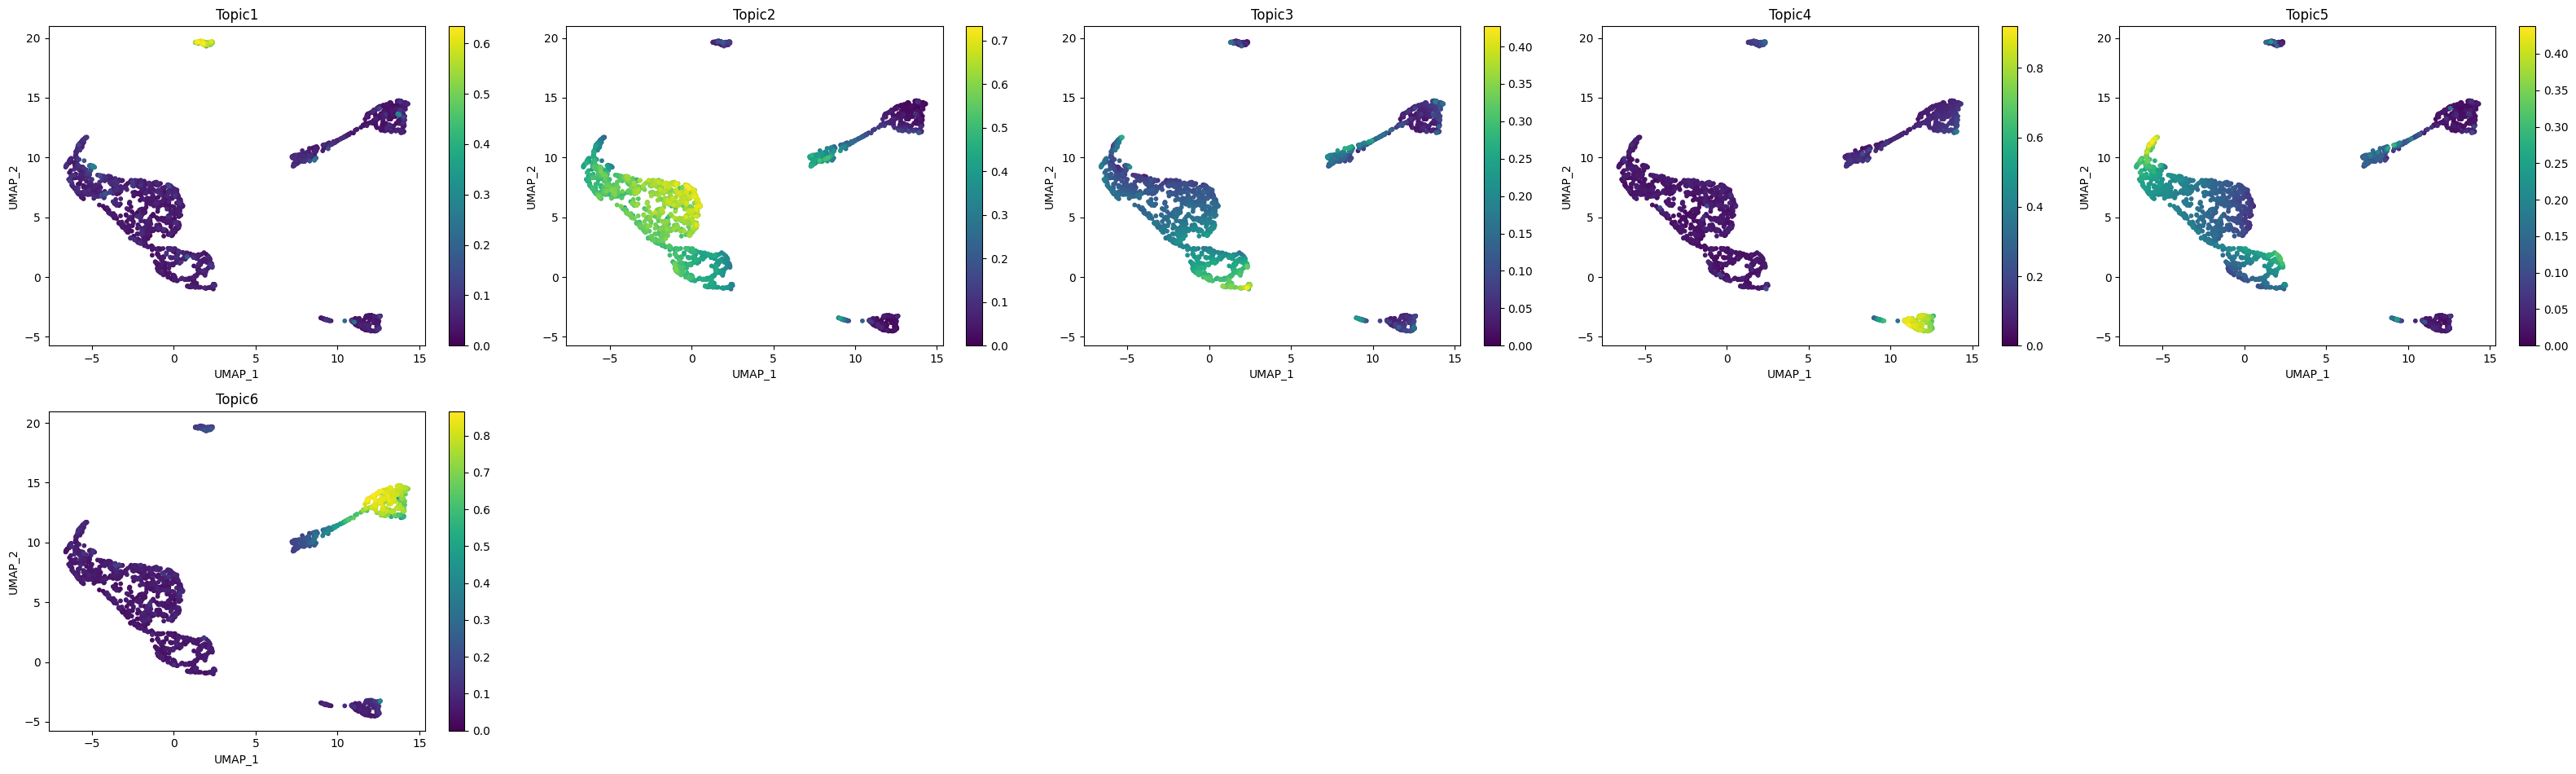

In [44]:
# cell topic contributions- 
plot_topic(
    cistopic_obj,
    reduction_name = 'UMAP',
    target = 'cell',
    num_columns=5
)

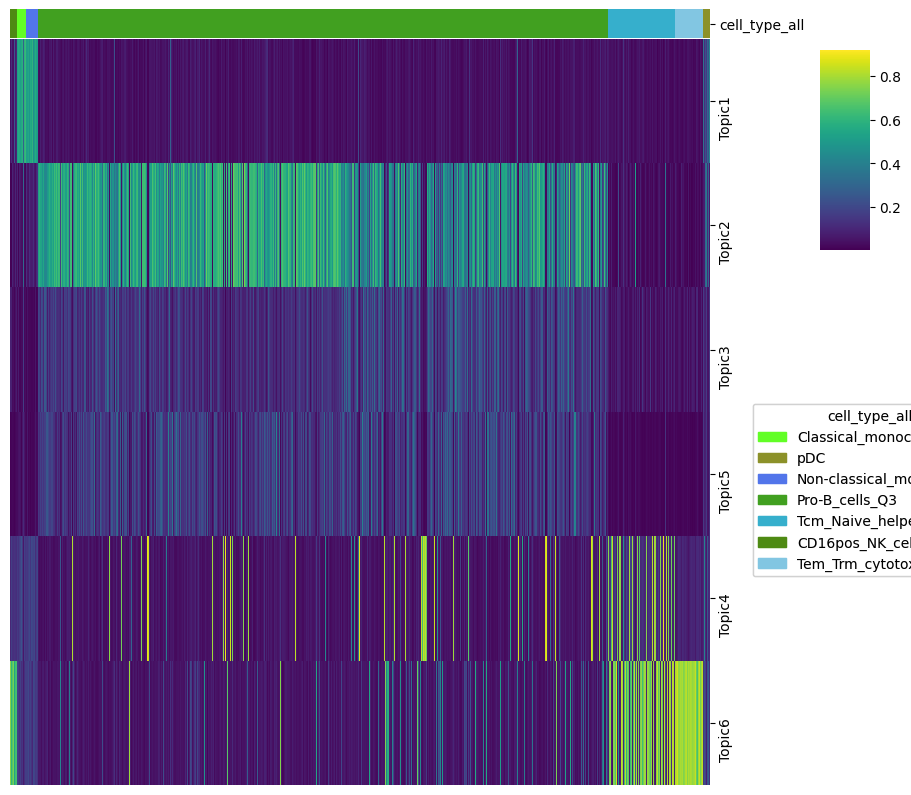

In [45]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['cell_type_all'],
    scale = False,
    legend_loc_x = 1.0,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10)
)

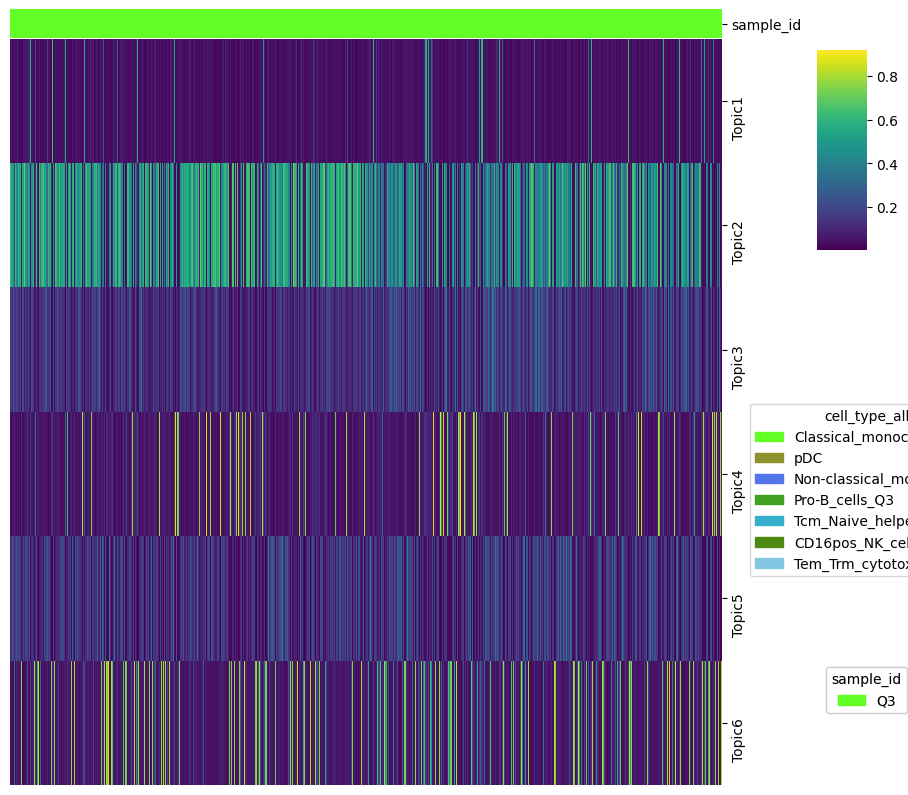

In [46]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['sample_id'],
    scale = False,
    legend_loc_x = 1.0,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10)
)

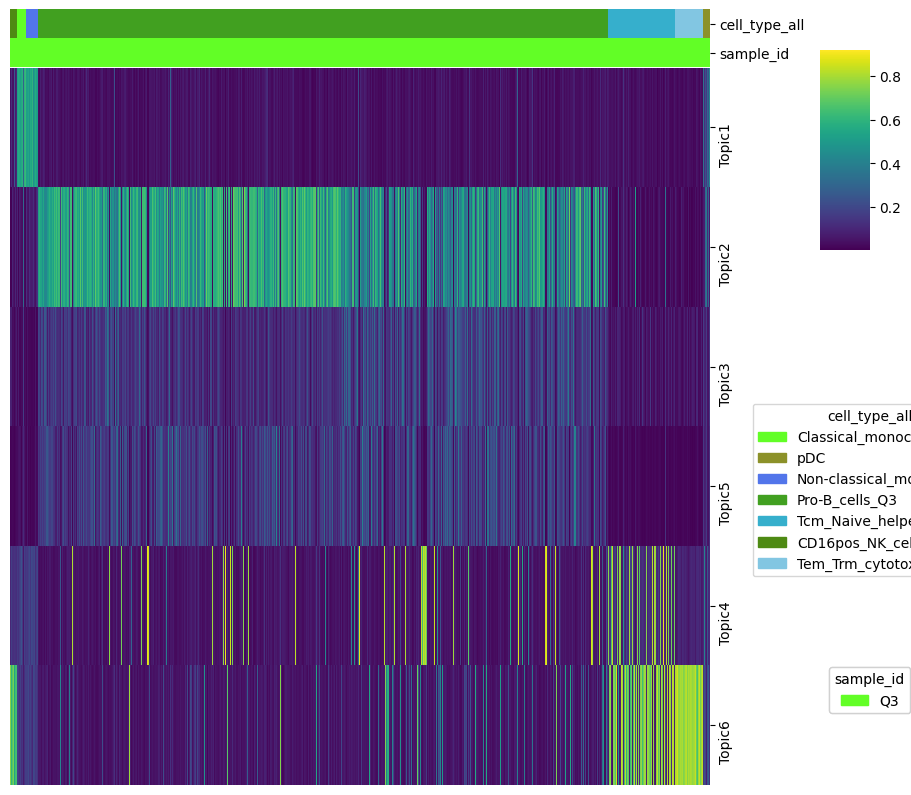

In [47]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['cell_type_all','sample_id'],
    scale = False,
    legend_loc_x = 1.0,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10)
)

# Topic binarization

In [48]:
from pycisTopic.topic_binarization import binarize_topics

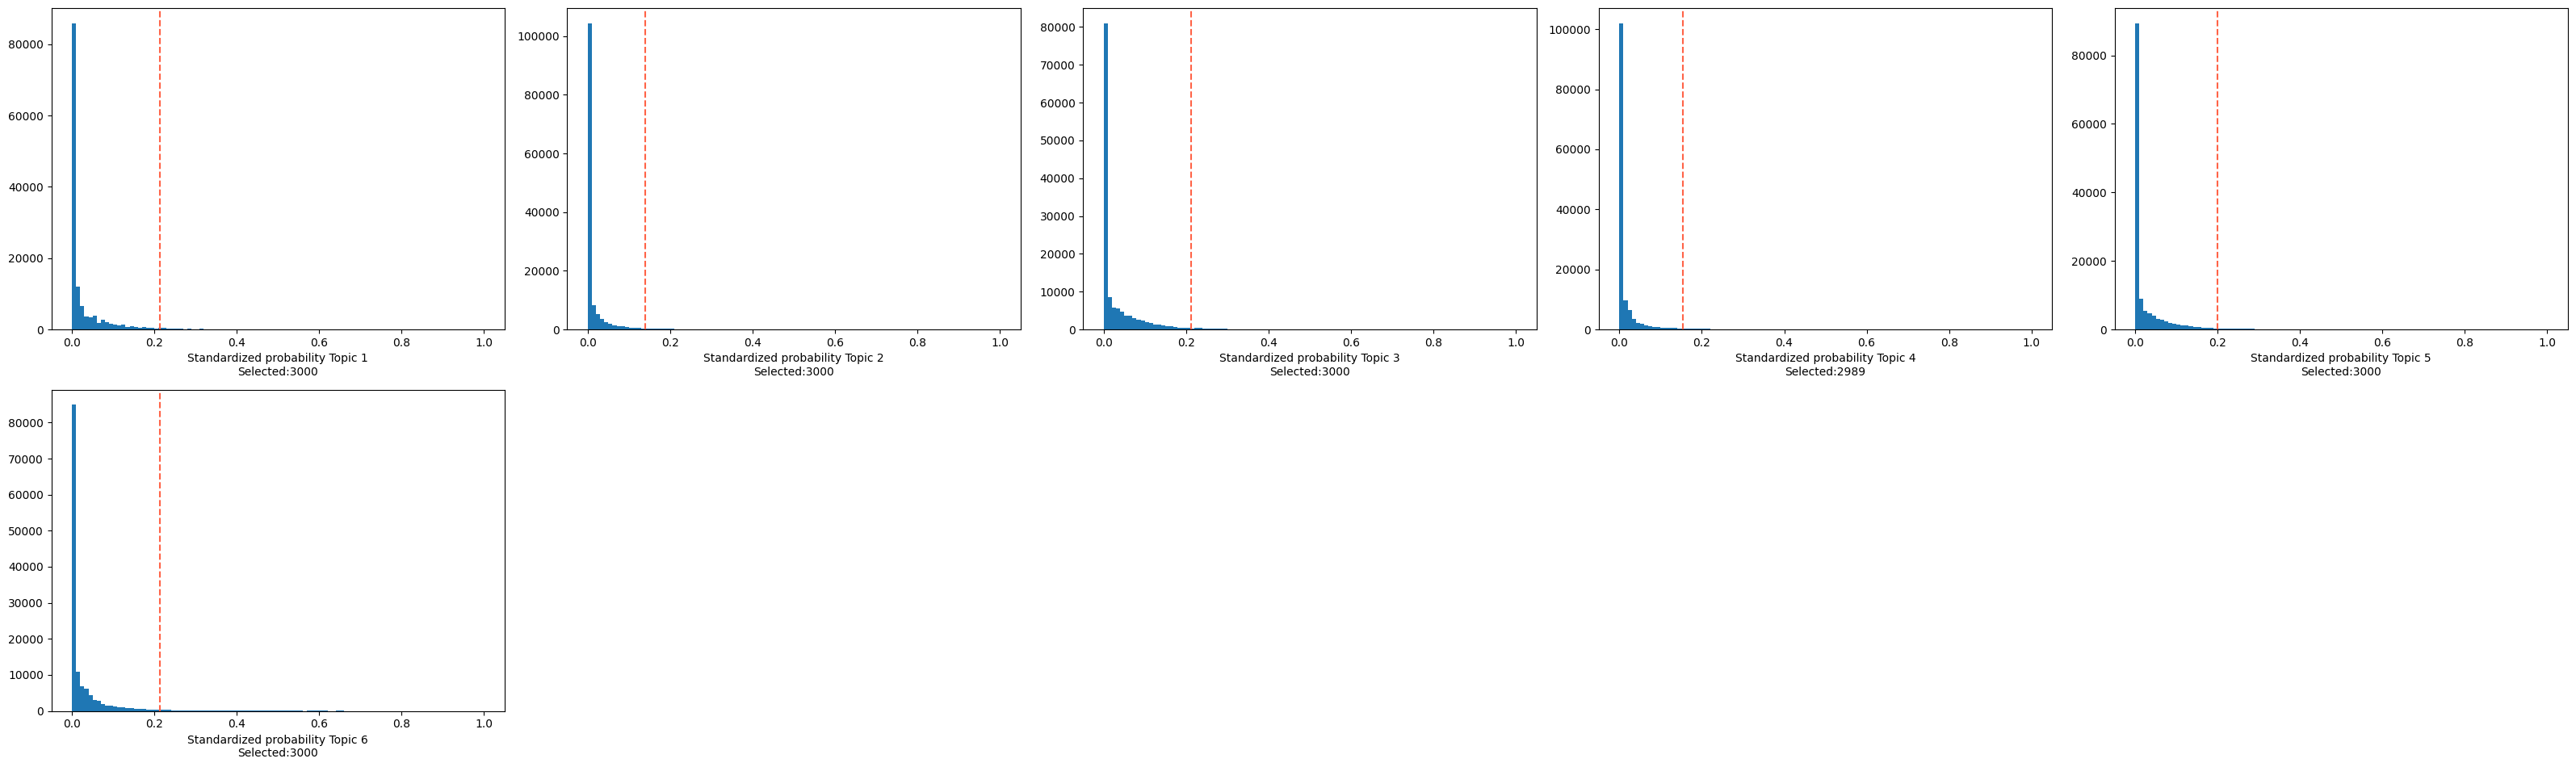

In [49]:
region_bin_topics_top_3k = binarize_topics(
    cistopic_obj, method='ntop', ntop = 3_000,
    plot=True, num_columns=5
)

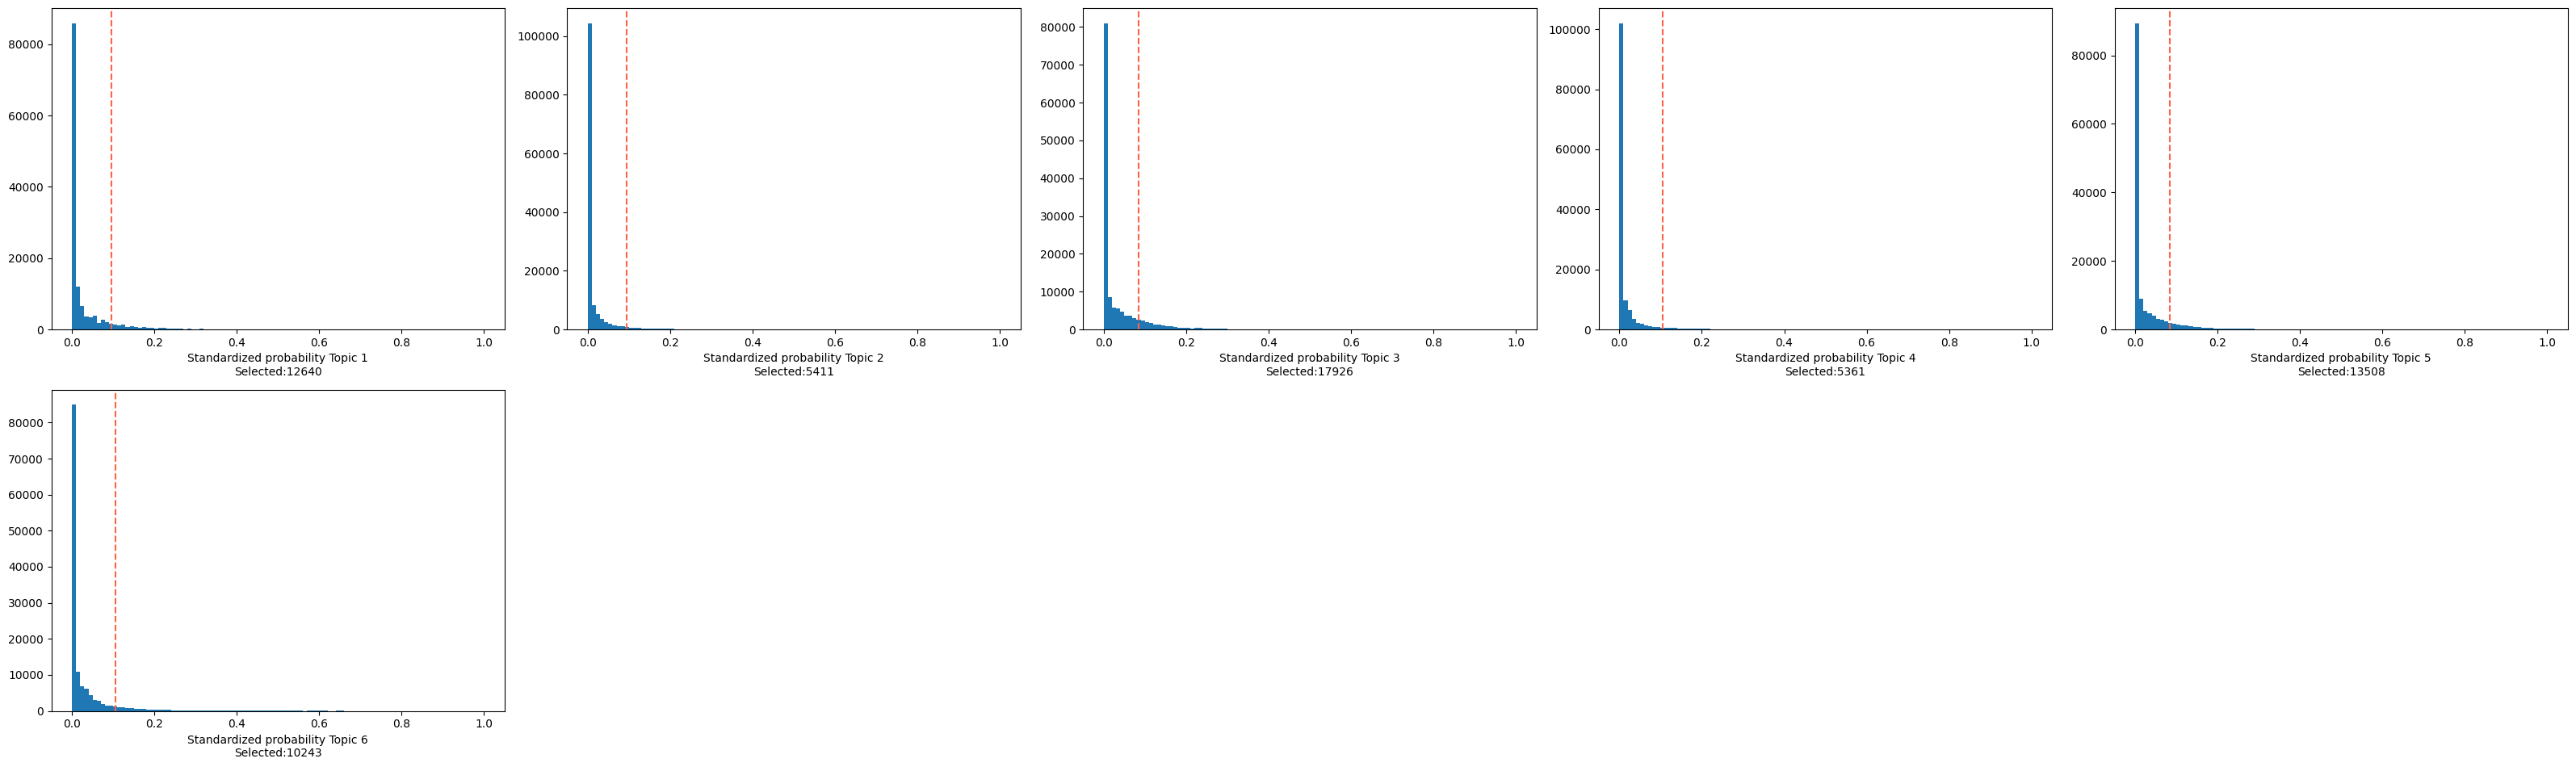

In [50]:
region_bin_topics_otsu = binarize_topics(
    cistopic_obj, method='otsu',
    plot=True, num_columns=5
)

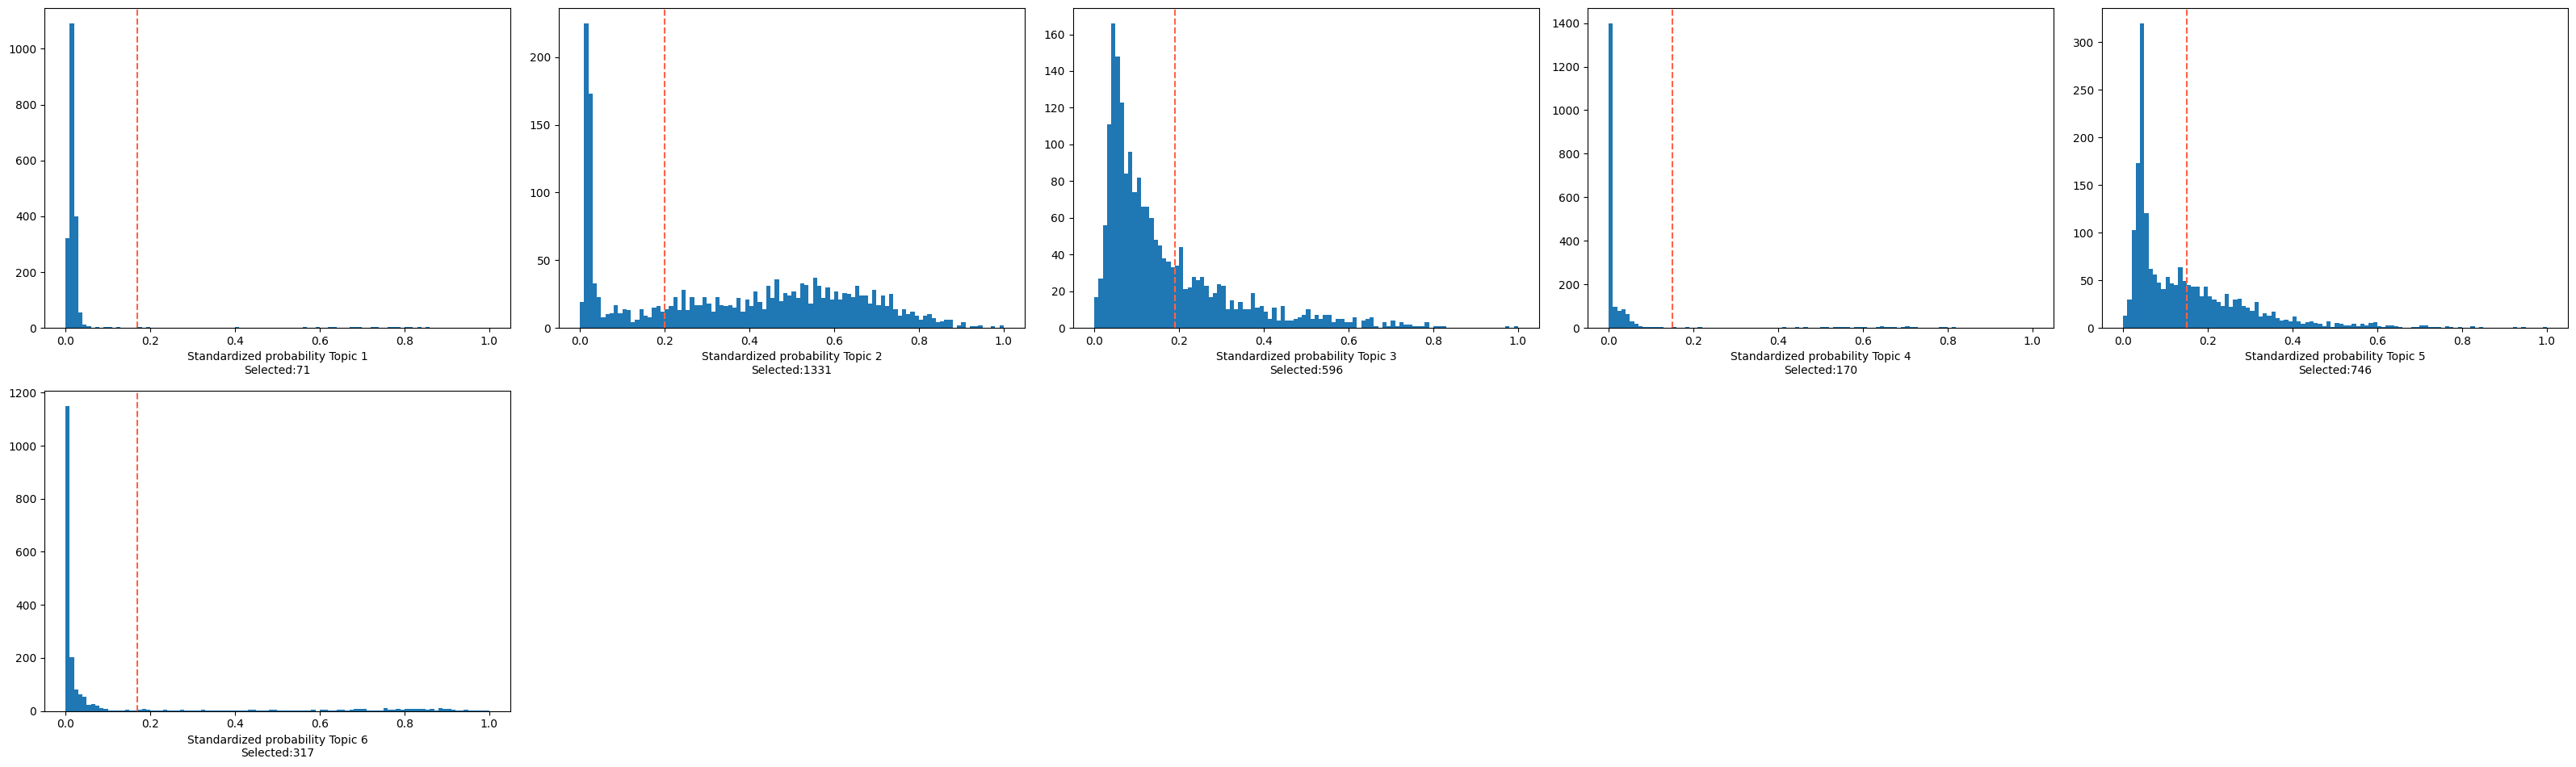

In [51]:
binarized_cell_topic = binarize_topics(
    cistopic_obj,
    target='cell',
    method='li',
    plot=True,
    num_columns=5, nbins=100)

In [52]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img

In [53]:
topic_qc_metrics = compute_topic_metrics(cistopic_obj)

In [54]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

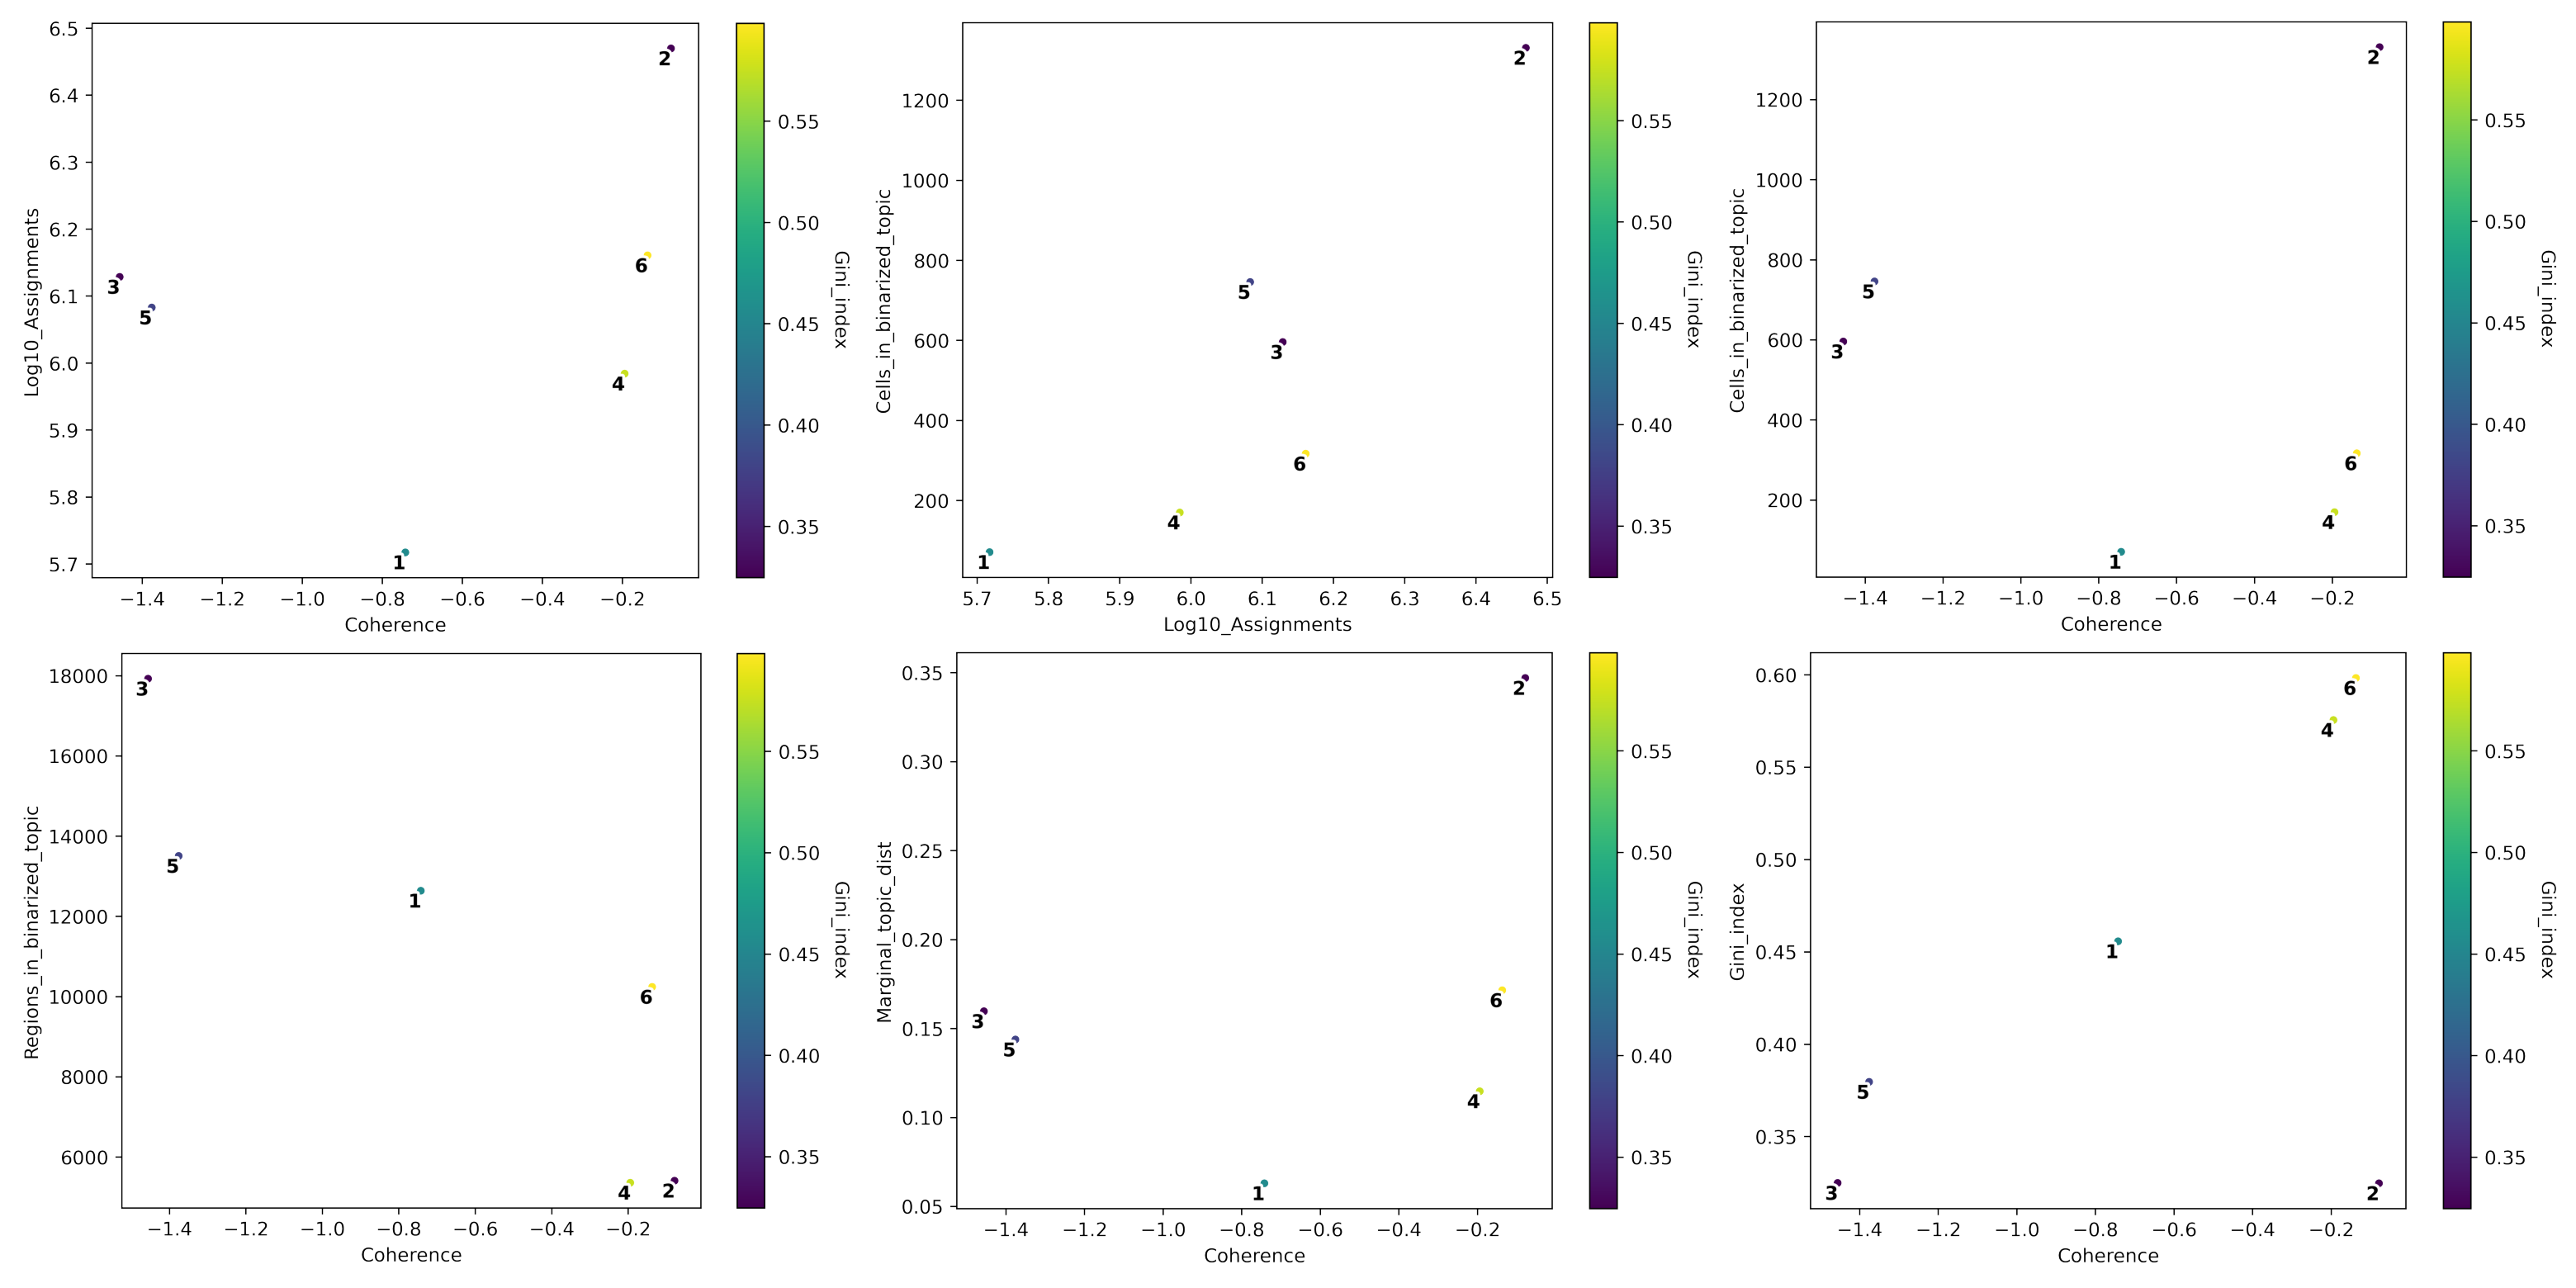

In [55]:
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()

Number of assignments

Topic coherence (Mimno et al., 2011): Measures to which extent high scoring regions in the topic are actually co-accessible in the original data. If it is low it indicates that the topic is rather random. The higher, the better is a topic.

The marginal topic distribution: Indicates how much each topic contributes to the model. The higher, the better is a topic.

The gini index: Value between 0 and 1, that indicates the specificity of topics (0: General, 1:Specific)

If topics have been binarized, the number of regions/cells per topic will be added.

# Cell type - topic annotation

In [56]:
topic_annot = topic_annotation(
    cistopic_obj,
    annot_var='cell_type_all',
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr = 0.2
)

/opt/venv/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [57]:
topic_annot

cell_type_all  \
Topic1  Classical_monocytes, pDC, Non-classical_monocytes   
Topic2                                     Pro-B_cells_Q3   
Topic3                                     Pro-B_cells_Q3   
Topic4                           Tcm_Naive_helper_T_cells   
Topic5                                     Pro-B_cells_Q3   
Topic6  Tcm_Naive_helper_T_cells, CD16pos_NK_cells, Te...   

       Ratio_cells_in_topic Ratio_group_in_population  is_general  
Topic1             0.036004                  0.040061       False  
Topic2             0.674949                  0.813895       False  
Topic3             0.302231                  0.813895       False  
Topic4             0.086207                  0.096349       False  
Topic5             0.378296                  0.813895       False  
Topic6             0.160751                  0.146045       False

# DAR

In [58]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np

In [59]:
imputed_acc_obj = impute_accessibility(
    cistopic_obj,
    selected_cells=None,
    selected_regions=None,
    scale_factor=10**6
)

2025-07-11 15:37:42,740 cisTopic     INFO     Imputing region accessibility
2025-07-11 15:37:42,741 cisTopic     INFO     Impute region accessibility for regions 0-20000
2025-07-11 15:37:42,943 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2025-07-11 15:37:43,132 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2025-07-11 15:37:43,319 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2025-07-11 15:37:43,509 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2025-07-11 15:37:43,697 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2025-07-11 15:37:43,887 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2025-07-11 15:37:44,027 cisTopic     INFO     Done!


In [60]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2025-07-11 15:37:44,031 cisTopic     INFO     Normalizing imputed data
2025-07-11 15:37:45,234 cisTopic     INFO     Done!


2025-07-11 15:37:45,238 cisTopic     INFO     Calculating mean
2025-07-11 15:37:45,488 cisTopic     INFO     Calculating variance


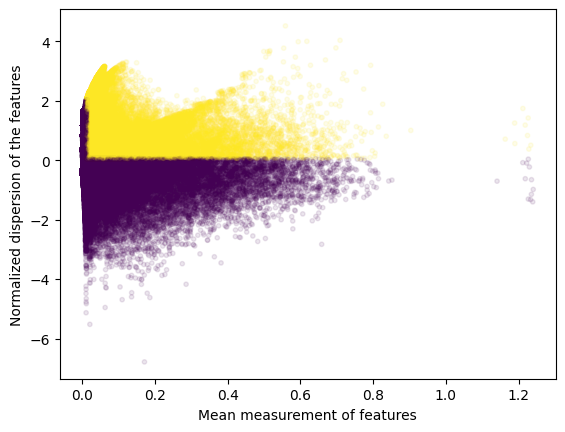

2025-07-11 15:37:50,506 cisTopic     INFO     Done!


In [61]:
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True
)

In [62]:
len(variable_regions)

40703

In [ ]:
markers_dict= find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='cell_type_all',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/ray_spill',
    split_pattern = '-'
)

2025-07-11 15:37:54,487	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-11 15:37:55,522 cisTopic     INFO     Subsetting data for CD16pos_NK_cells (20 of 1972)
2025-07-11 15:38:00,039 cisTopic     INFO     Computing p-value for CD16pos_NK_cells
2025-07-11 15:38:05,545 cisTopic     INFO     Computing log2FC for CD16pos_NK_cells
2025-07-11 15:38:07,427 cisTopic     INFO     CD16pos_NK_cells done!
2025-07-11 15:38:07,430 cisTopic     INFO     Subsetting data for Classical_monocytes (25 of 1972)
2025-07-11 15:38:07,512 cisTopic     INFO     Computing p-value for Classical_monocytes
2025-07-11 15:38:12,020 cisTopic     INFO     Computing log2FC for Classical_monocytes
2025-07-11 15:38:12,069 cisTopic     INFO     Classical_monocytes done!
2025-07-11 15:38:12,071 cisTopic     INFO     Subsetting data for Non-classical_monocytes (34 of 1972)
2025-07-11 15:38:12,154 cisTopic     INFO     Computing p-value for Non-classical_monocytes
2025-07-11 15:38:16,739 cisTopic     INFO     Computing log2FC for Non-classical_monocytes
2025-07-11 15:38:16,787 cisTopic  

In [64]:
from pycisTopic.clust_vis import plot_imputed_features

In [65]:
cistopic_obj.cell_data.cell_type_all.value_counts()

Pro-B_cells_Q3               1605
Tcm_Naive_helper_T_cells      190
Tem_Trm_cytotoxic_T_cells      78
Non-classical_monocytes        34
Classical_monocytes            25
pDC                            20
CD16pos_NK_cells               20
Name: cell_type_all, dtype: int64

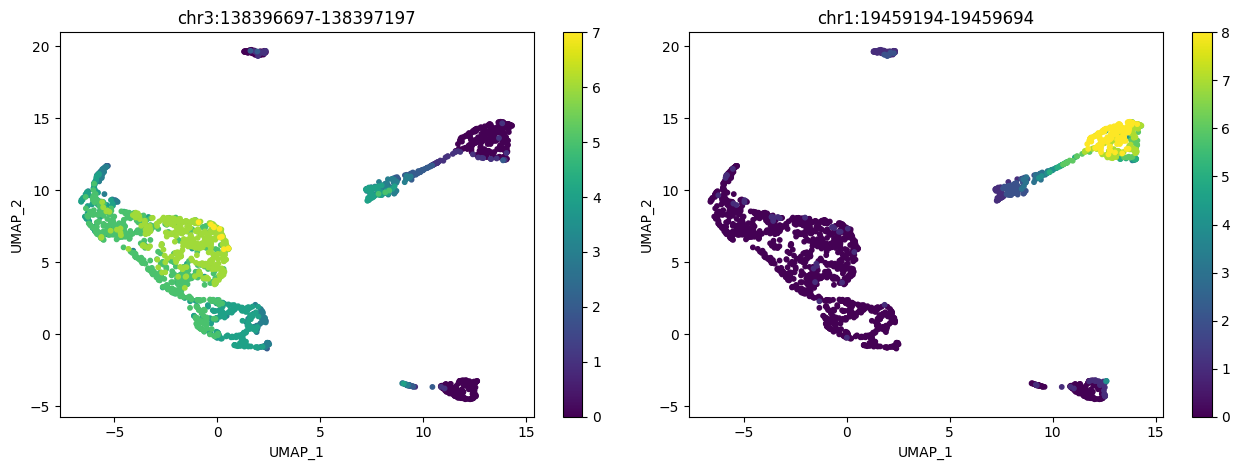

In [66]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=imputed_acc_obj,
    features=[markers_dict[x].index.tolist()[0] for x in ['Pro-B_cells_Q3','Tem_Trm_cytotoxic_T_cells']],
    scale=False,
    num_columns=4
)

In [67]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

Number of DARs found:
---------------------
  CD16pos_NK_cells: 12604
  Classical_monocytes: 10812
  Non-classical_monocytes: 12209
  Pro-B_cells_Q3: 15264
  Tcm_Naive_helper_T_cells: 16729
  Tem_Trm_cytotoxic_T_cells: 12619
  pDC: 9228


In [68]:
# save region sets
os.makedirs(os.path.join(out_dir, "region_sets"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_otsu"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_top_3k"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "DARs_cell_type"), exist_ok = True)

In [69]:
from pycisTopic.utils import region_names_to_coordinates

In [70]:
for topic in region_bin_topics_otsu:
    region_names_to_coordinates(
        region_bin_topics_otsu[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_otsu", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [71]:
for topic in region_bin_topics_top_3k:
    region_names_to_coordinates(
        region_bin_topics_top_3k[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_top_3k", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [72]:
for cell_type in markers_dict:
    region_names_to_coordinates(
        markers_dict[cell_type].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "DARs_cell_type", f"{cell_type}.bed"),
        sep = "\t",
        header = False, index = False
    )

# Gene activity

In [73]:
import pyranges as pr
from pycisTopic.gene_activity import get_gene_activity

In [ ]:
chromsizes = pd.read_table(os.path.join("/preprocessing/atac/outs", "qc", "hg38.chrom_sizes_and_alias.tsv")) # you may need to adjust the path
chromsizes

# ucsc     length             ensembl     refseq_id  genbank_id
0                chr1  248956422                   1  NC_000001.11  CM000663.2
1                chr2  242193529                   2  NC_000002.12  CM000664.2
2                chr3  198295559                   3  NC_000003.12  CM000665.2
3                chr4  190214555                   4  NC_000004.12  CM000666.2
4                chr5  181538259                   5  NC_000005.10  CM000667.2
..                ...        ...                 ...           ...         ...
449  chrUn_KI270539v1        993  HSCHRUN_RANDOM_146   NT_187442.1  KI270539.1
450  chrUn_KI270385v1        990  HSCHRUN_RANDOM_195   NT_187487.1  KI270385.1
451  chrUn_KI270423v1        981  HSCHRUN_RANDOM_121   NT_187417.1  KI270423.1
452  chrUn_KI270392v1        971  HSCHRUN_RANDOM_193   NT_187485.1  KI270392.1
453  chrUn_KI270394v1        970  HSCHRUN_RANDOM_187   NT_187479.1  KI270394.1

[454 rows x 5 columns]

In [75]:
chromsizes.rename({"# ucsc": "Chromosome", "length": "End"}, axis = 1, inplace = True)
chromsizes["Start"] = 0
chromsizes = pr.PyRanges(chromsizes[["Chromosome", "Start", "End"]])

In [ ]:
pr_annotation = pd.read_table(
        os.path.join("/preprocessing/atac/outs", "qc", "tss.bed") # you may need to adjust the path
    ).rename(
        {"Name": "Gene", "# Chromosome": "Chromosome"}, axis = 1)
pr_annotation["Transcription_Start_Site"] = pr_annotation["Start"]
pr_annotation = pr.PyRanges(pr_annotation)
pr_annotation

+--------------+-----------+-----------+------------+------------+-------+
| Chromosome   | Start     | End       | Gene       | Score      | +3    |
| (category)   | (int32)   | (int32)   | (object)   | (object)   | ...   |
|--------------+-----------+-----------+------------+------------+-------|
| GL000009.2   | 58375     | 58376     | nan        | .          | ...   |
| GL000194.1   | 115017    | 115018    | nan        | .          | ...   |
| GL000194.1   | 115054    | 115055    | MAFIP      | .          | ...   |
| GL000195.1   | 49163     | 49164     | nan        | .          | ...   |
| ...          | ...       | ...       | ...        | ...        | ...   |
| chrY         | 6872607   | 6872608   | AMELY      | .          | ...   |
| chrY         | 21918031  | 21918032  | RBMY1E     | .          | ...   |
| chrY         | 24047968  | 24047969  | CDY1B      | .          | ...   |
| chrY         | 24048018  | 24048019  | CDY1B      | .          | ...   |
+--------------+-----------+-----------+------------+------------+-------+
Stranded PyRanges object has 87,561 rows and 8 columns from 407 chromosomes.
For printing, the PyRanges was sorted on Chromosome and Strand.
3 hidden columns: Strand, Transcript_type, Transcription_Start_Site

In [77]:
gene_act, weigths = get_gene_activity(
    imputed_acc_obj,
    pr_annotation,
    chromsizes,
    use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
    upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it
                             # these bp will be taken (1kbp here)
    downstream=[1000,100000], # Search space downstream
    distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
    decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
    extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for
                          #this weight)
    extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
    gene_size_weight=False, # Whether to add a weights based on the length of the gene
    gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                          #in the genome
    remove_promoters=False, # Whether to remove promoters when computing gene activity scores
    average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene
                          #activity score
    scale_factor=1, # Value to multiply for the final gene activity matrix
    extend_tss=[10,10], # Space to consider a promoter
    gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
    return_weights= True, # Whether to return the final weights
    project='Gene_activity') # Project name for the gene activity object

2025-07-11 15:38:47,479 cisTopic     INFO     Calculating gene boundaries
2025-07-11 15:39:03,929 cisTopic     INFO     Calculating distances


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2025-07-11 15:39:10,586 cisTopic     INFO     Calculating distance weigths
2025-07-11 15:39:11,081 cisTopic     INFO     Distance weights done
2025-07-11 15:39:11,082 cisTopic     INFO     Calculating gini weights
2025-07-11 15:39:14,983 cisTopic     INFO     Getting gene activity scores
2025-07-11 15:40:50,791 cisTopic     INFO     Creating imputed features object


In [ ]:
DAG_markers_dict= find_diff_features(
    cistopic_obj,
    gene_act,
    variable='cell_type_all',
    var_features=None,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=15,
    _temp_dir='/ray_spill',
    split_pattern = '-')

2025-07-11 15:40:54,598	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-11 15:40:55,726 cisTopic     INFO     Subsetting data for CD16pos_NK_cells (20 of 1972)
2025-07-11 15:40:58,430 cisTopic     INFO     Computing p-value for CD16pos_NK_cells
2025-07-11 15:41:01,133 cisTopic     INFO     Computing log2FC for CD16pos_NK_cells
2025-07-11 15:41:03,188 cisTopic     INFO     CD16pos_NK_cells done!
2025-07-11 15:41:03,190 cisTopic     INFO     Subsetting data for Classical_monocytes (25 of 1972)
2025-07-11 15:41:03,271 cisTopic     INFO     Computing p-value for Classical_monocytes
2025-07-11 15:41:05,019 cisTopic     INFO     Computing log2FC for Classical_monocytes
2025-07-11 15:41:05,058 cisTopic     INFO     Classical_monocytes done!
2025-07-11 15:41:05,060 cisTopic     INFO     Subsetting data for Non-classical_monocytes (34 of 1972)
2025-07-11 15:41:05,138 cisTopic     INFO     Computing p-value for Non-classical_monocytes
2025-07-11 15:41:06,892 cisTopic     INFO     Computing log2FC for Non-classical_monocytes
2025-07-11 15:41:06,927 cisTopic  

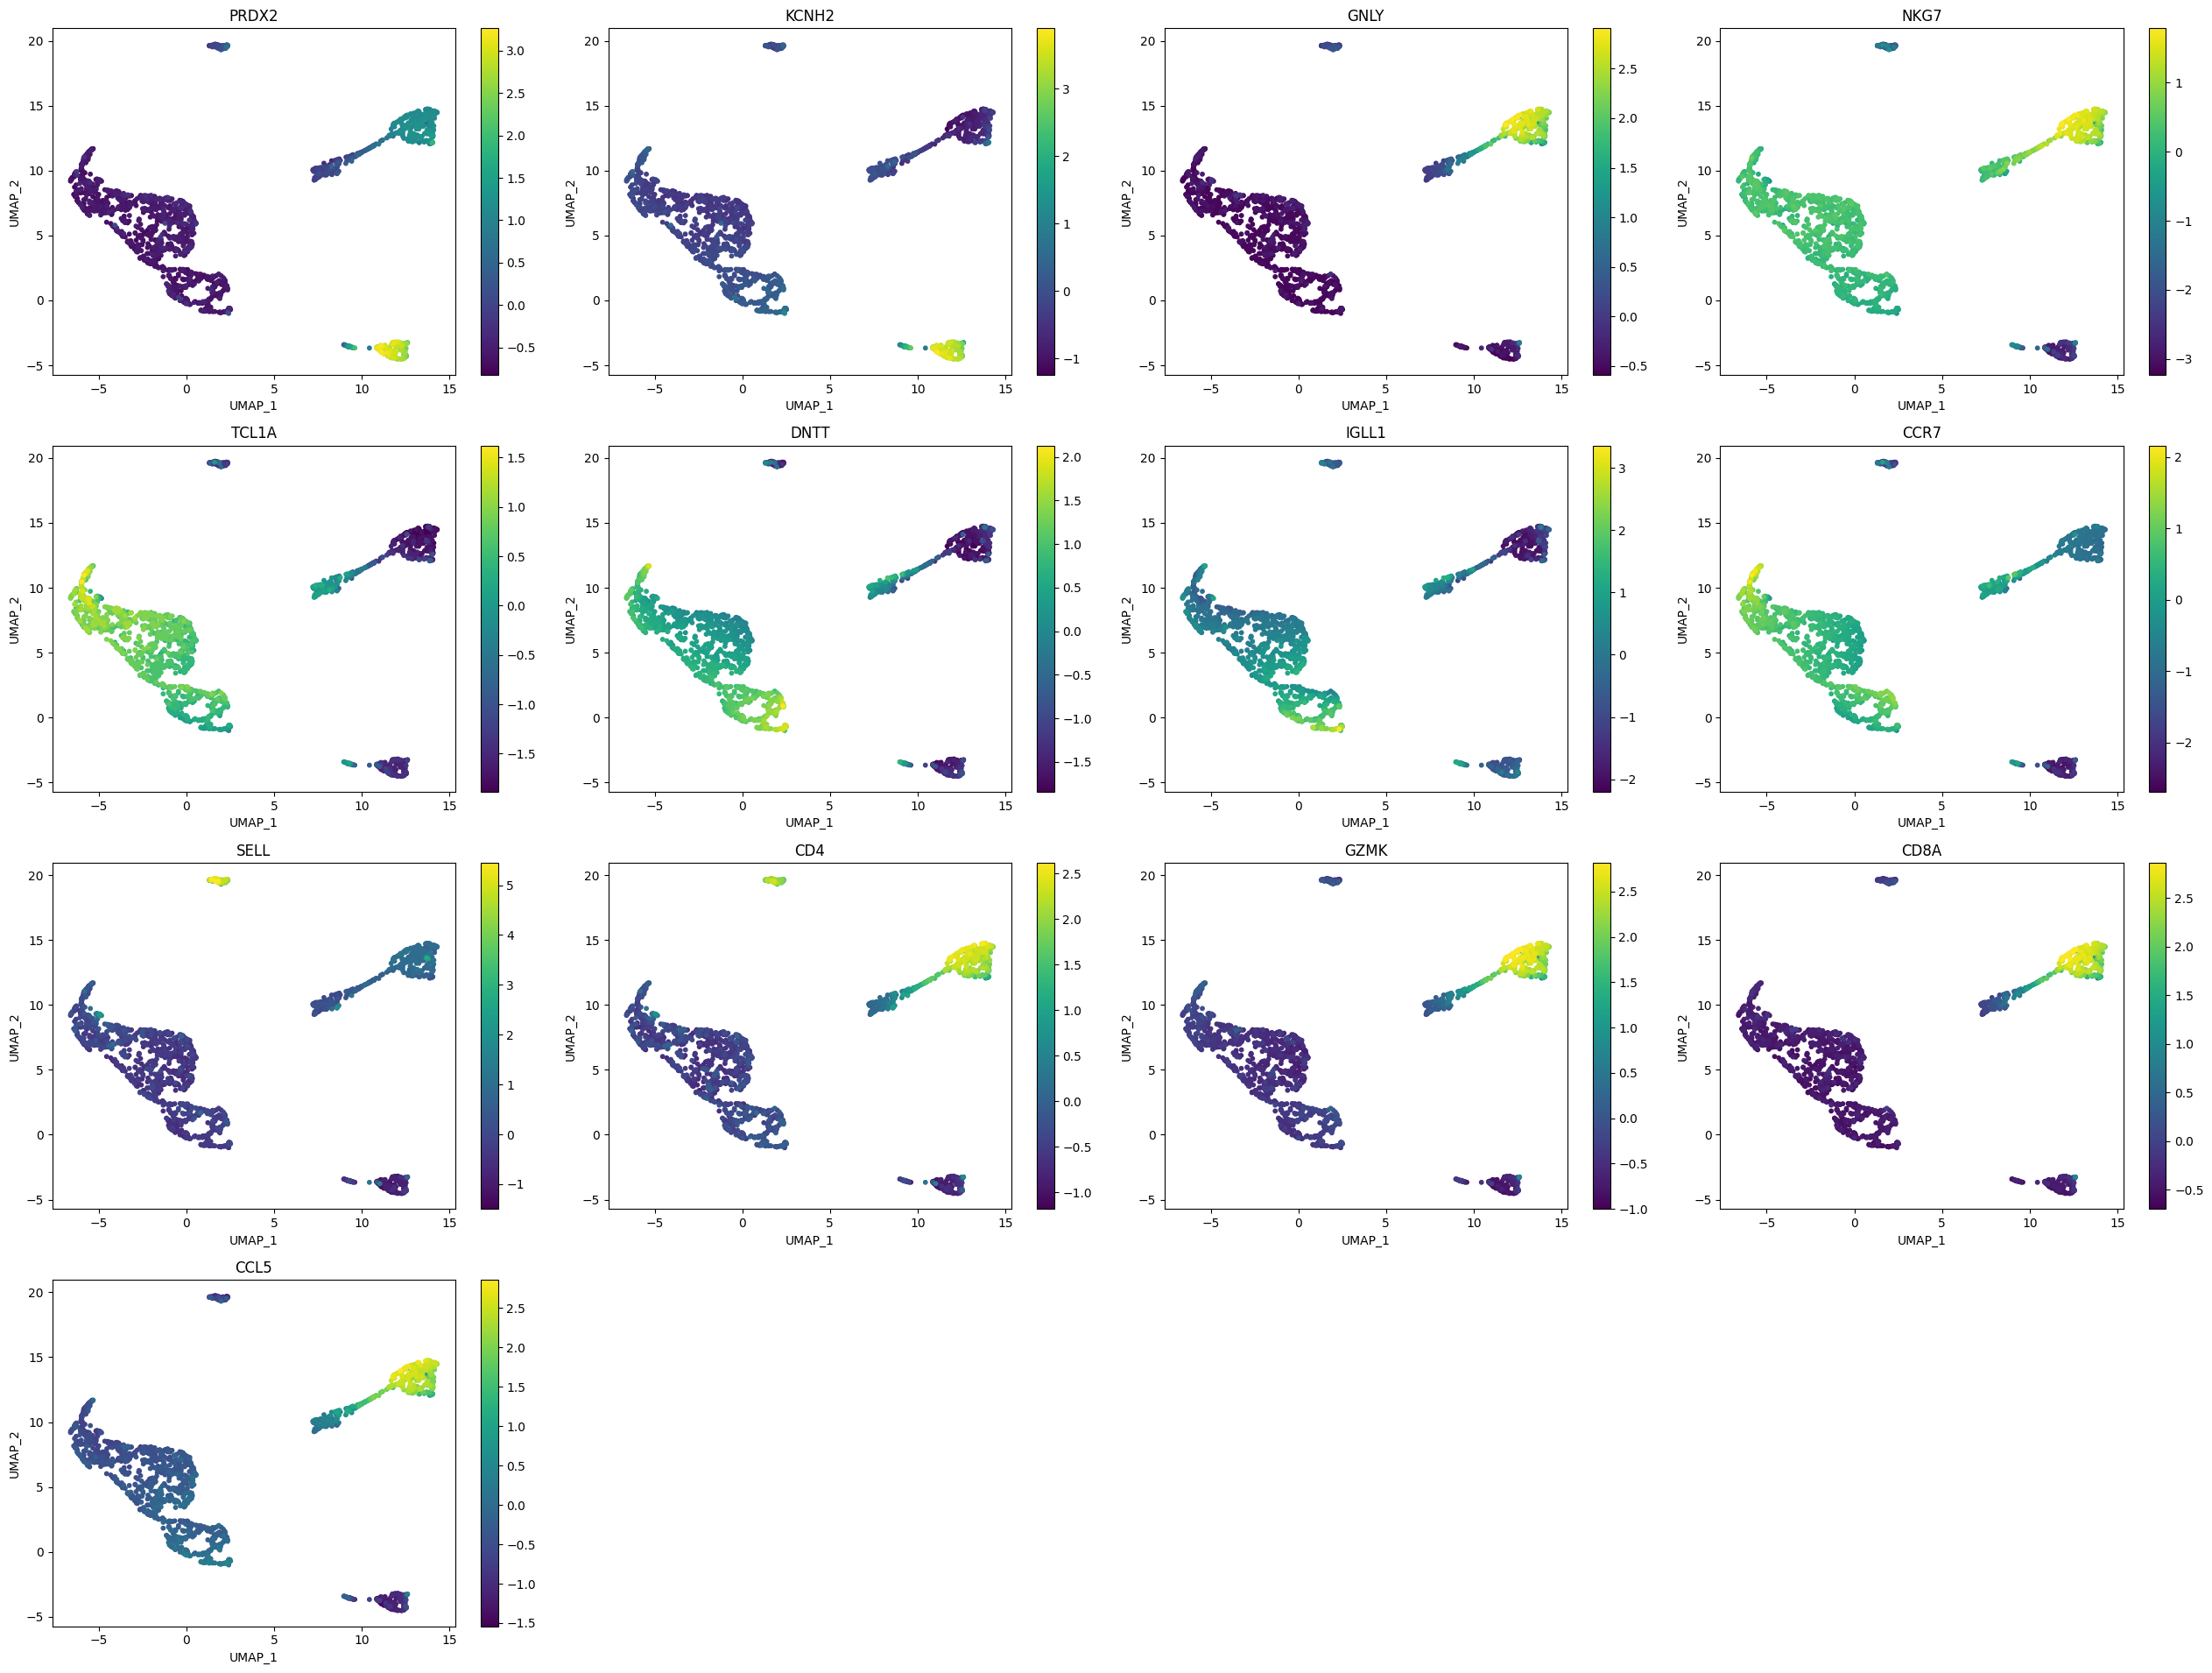

In [79]:
# cell typist
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=[
        'PRDX2','KCNH2', # Mid erythroid
        'GNLY','NKG7', # CD16+ NK cells
        'TCL1A', # naive B cells
        'DNTT','IGLL1', # Pro-B cells
        'CCR7','SELL','CD4', # Tcm/Naive helper T cells
        'GZMK','CD8A','CCL5'], # Tem/Trm cytotoxic T cells
    scale=True,
    num_columns=4
)


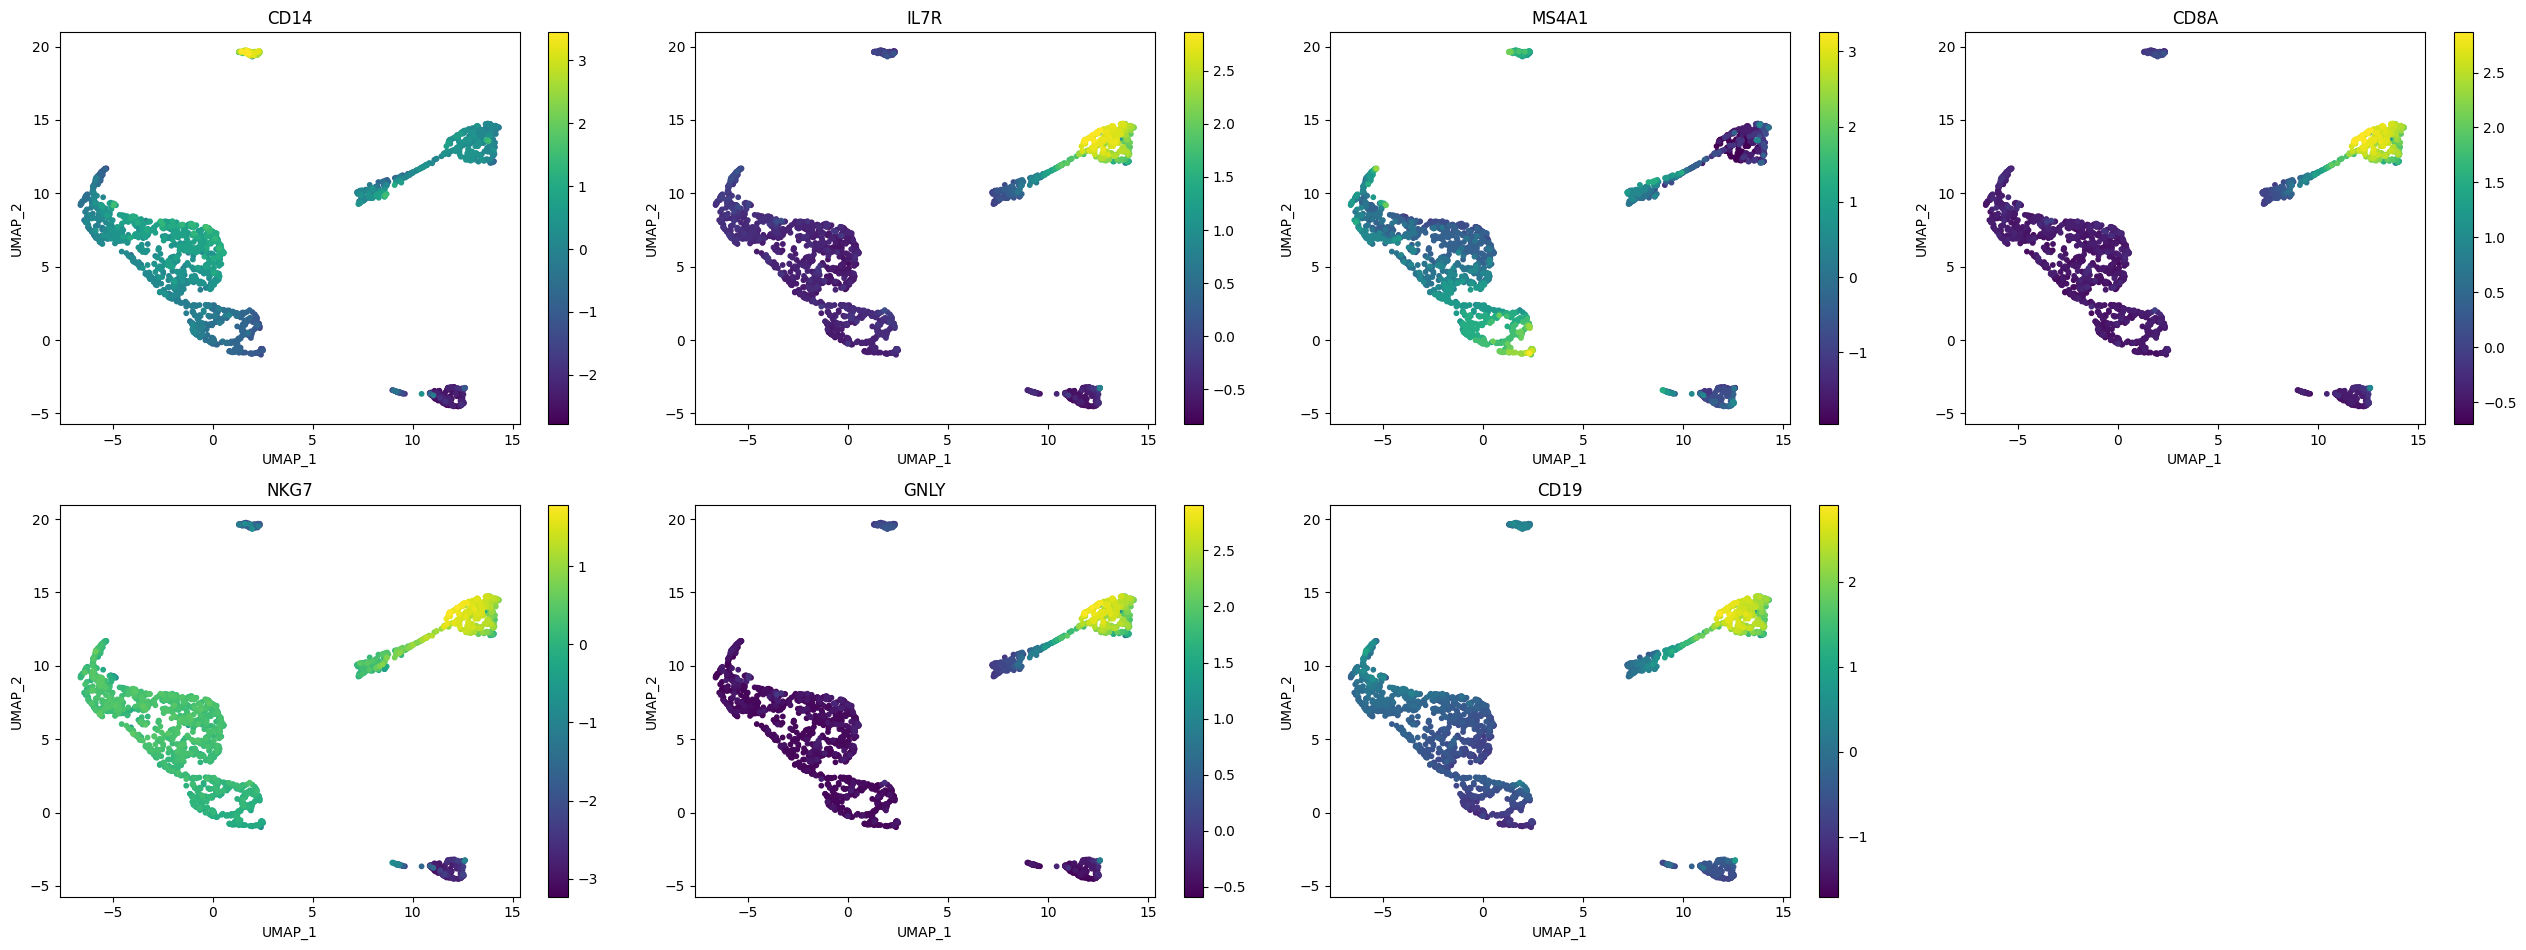

In [80]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['CD14', # CD14 mono
              'IL7R', # CD4
              'MS4A1', # B
              'CD8A',  #CD8+T
              'NKG7','GNLY', #NK
              'CD19'], #CD19 B-all
    scale=True,
    num_columns=4
)

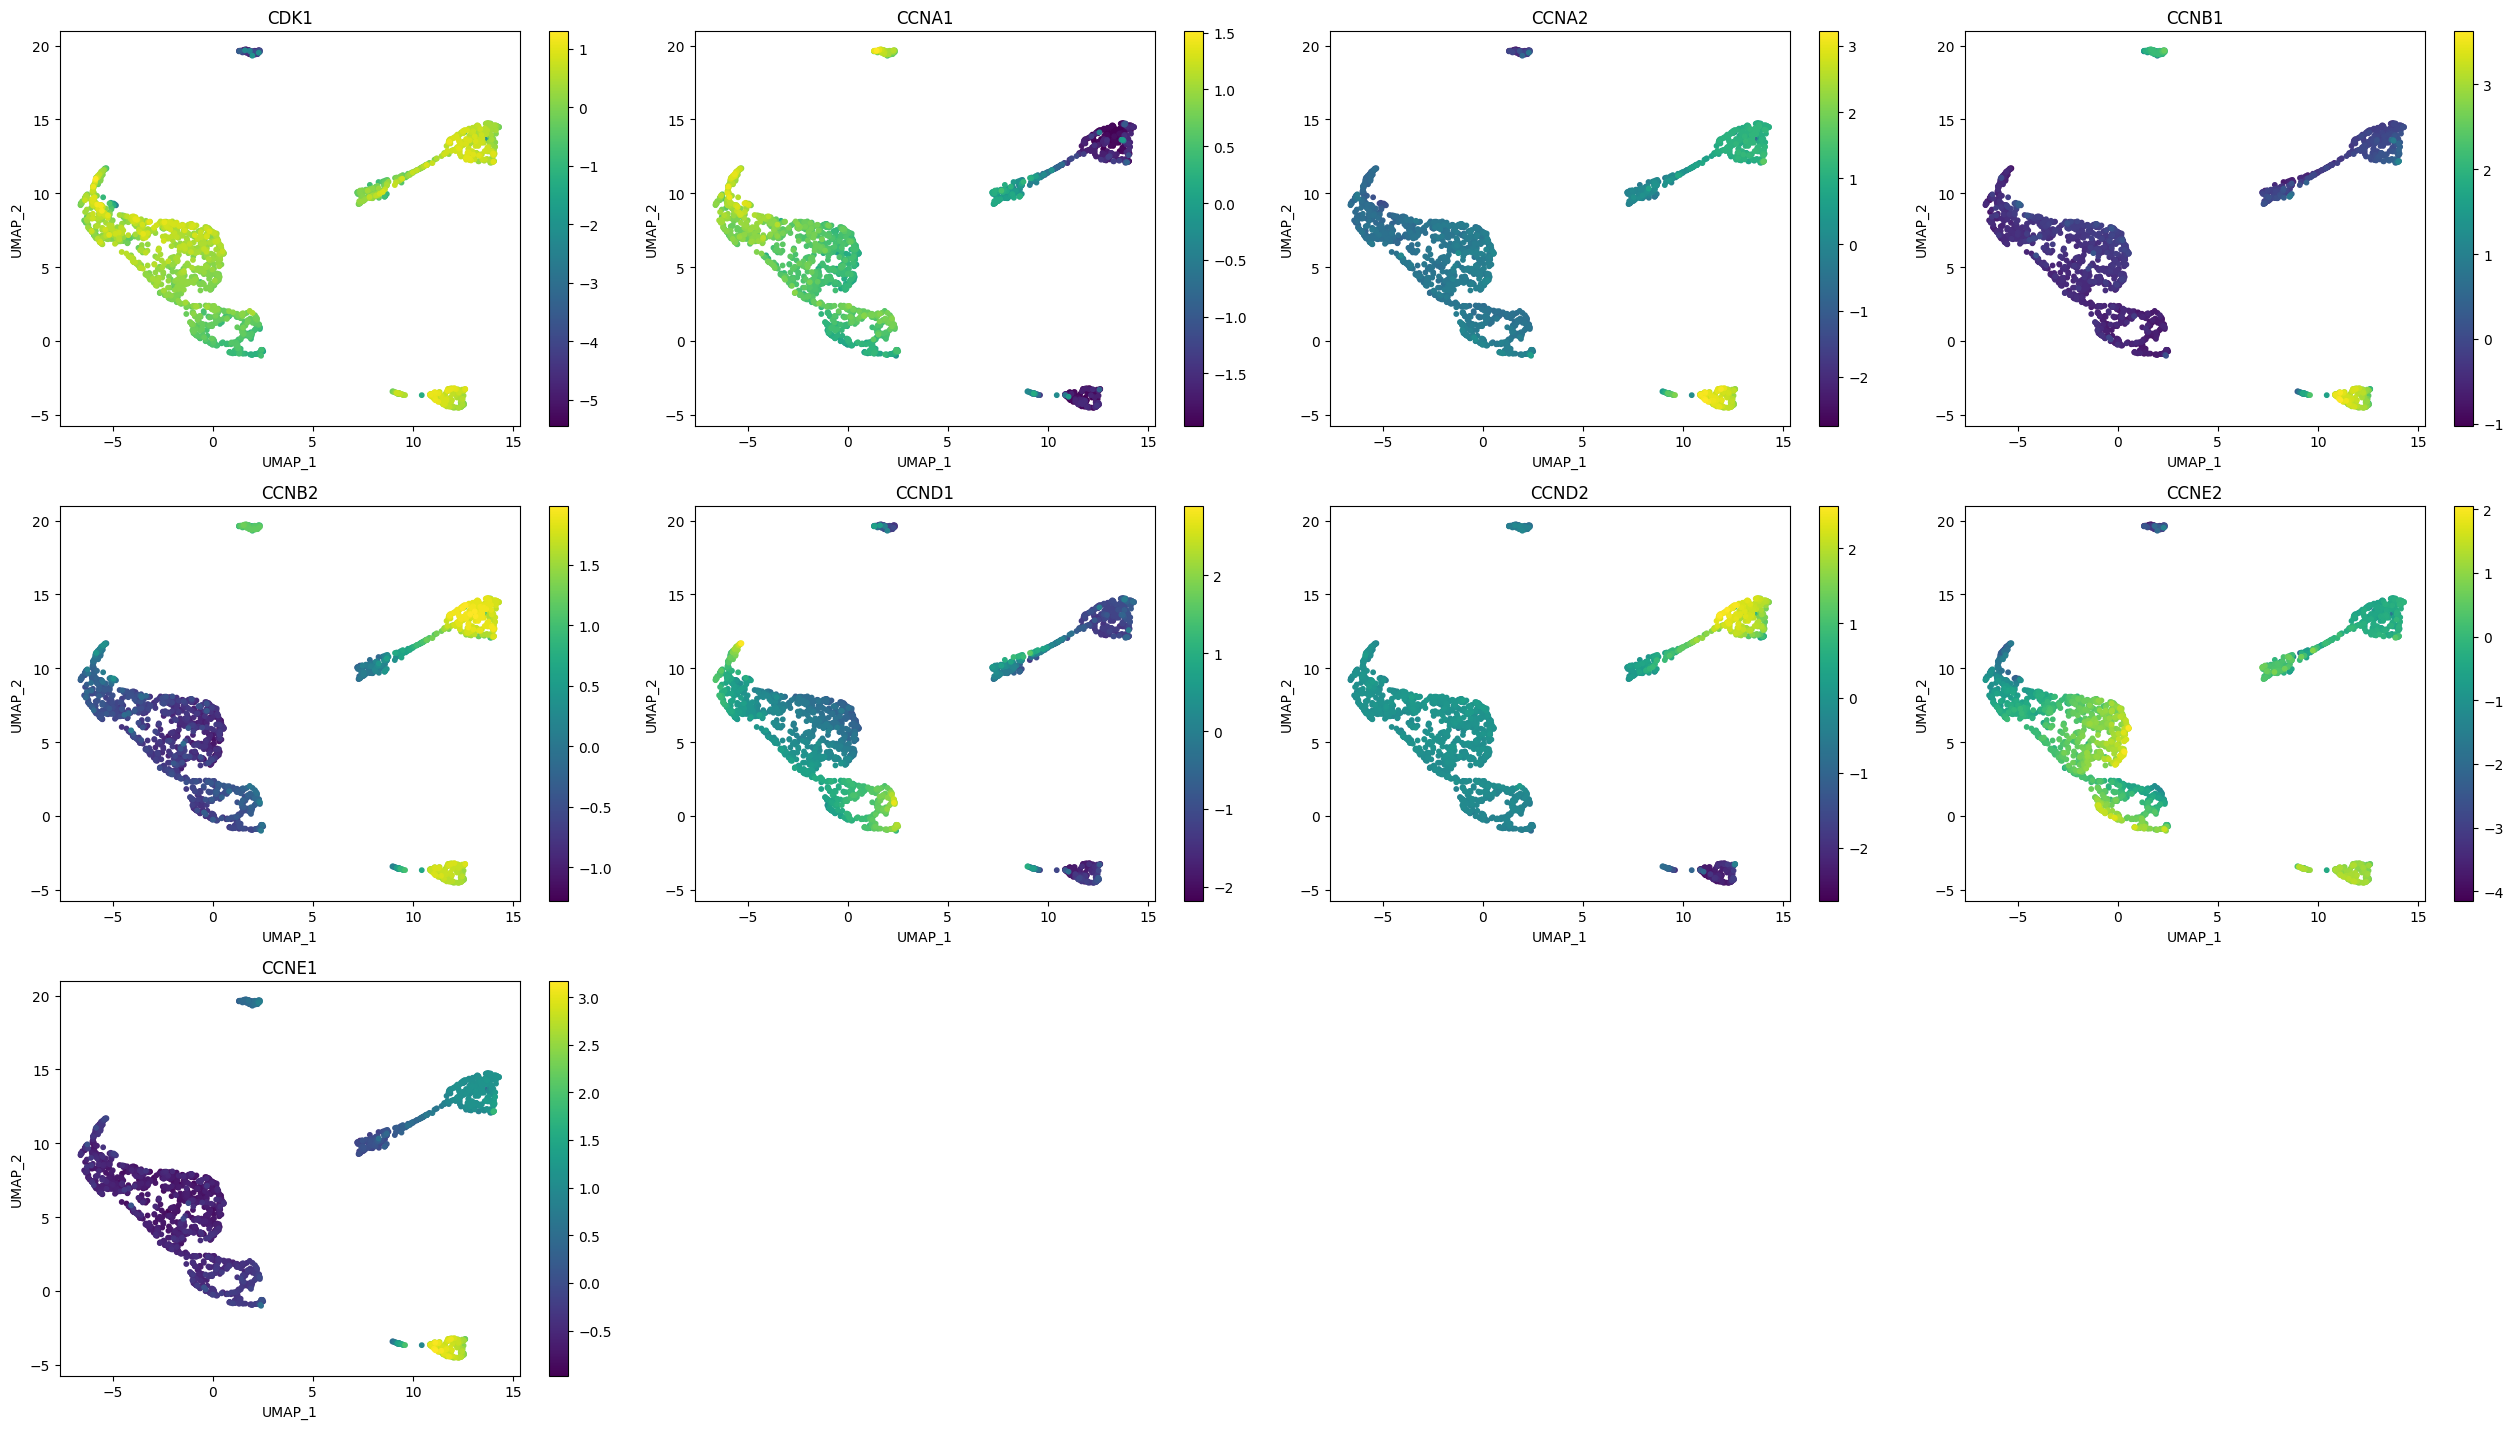

In [81]:
# cell cycle
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['CDK1',
              'CCNA1','CCNA2',
              'CCNB1','CCNB2',
              'CCND1','CCND2',
              'CCNE2','CCNE1'],
    scale=True,
    num_columns=4
)

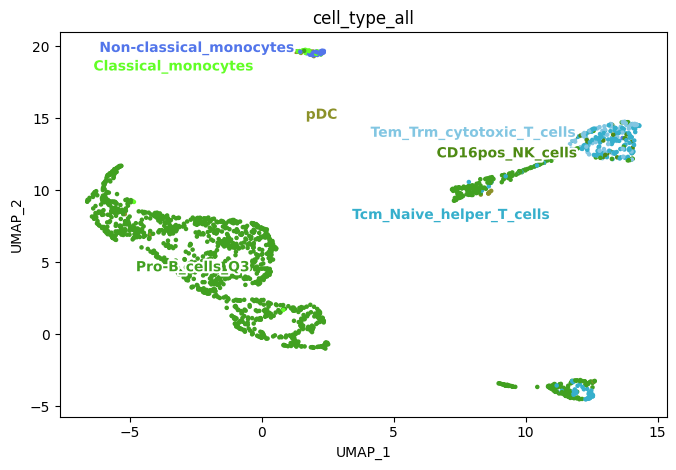

In [82]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type_all'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [83]:
print("Number of DAGs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(DAG_markers_dict[x])}")

Number of DAGs found:
---------------------
  CD16pos_NK_cells: 2987
  Classical_monocytes: 2861
  Non-classical_monocytes: 3074
  Pro-B_cells_Q3: 3032
  Tcm_Naive_helper_T_cells: 4031
  Tem_Trm_cytotoxic_T_cells: 3630
  pDC: 1467


In [84]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj_all_info.pkl"), "wb")
)

In [85]:
DAG_markers_dict.keys()

dict_keys(['CD16pos_NK_cells', 'Classical_monocytes', 'Non-classical_monocytes', 'Pro-B_cells_Q3', 'Tcm_Naive_helper_T_cells', 'Tem_Trm_cytotoxic_T_cells', 'pDC'])

In [86]:
pip list

Package                              Version
------------------------------------ -----------------
adjustText                           1.0.4
aiohttp                              3.9.3
aiosignal                            1.3.1
anndata                              0.10.5.post1
annoy                                1.17.3
appdirs                              1.4.4
arboreto                             0.1.6
argparse-dataclass                   2.0.0
array_api_compat                     1.5.1
asttokens                            2.4.1
attr                                 0.3.2
attrs                                23.2.0
bbknn                                1.6.0
beautifulsoup4                       4.12.3
bidict                               0.23.1
bioservices                          1.11.2
blosc2                               2.5.1
bokeh                                3.4.0
boltons                              23.1.1
bs4                                  0.0.2
cattrs                     